In [117]:
%load_ext autoreload
%autoreload 2
from keylog_analysis_helper import *
from data_prep_helper import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Load log files

- Read in log files, fix times, remove some participants 

In [2]:
keylog_data_a3, keylog_data_a4 = get_keylog_dfs()

Getting keylog data for a3 = True
Getting keylog data for a3 = False


Inspect start times and manually clip if needed

In [3]:
empatica_data_a3 = get_empatica_data(a3=True,keylogger=True)
empatica_data_a4 = get_empatica_data(a3=False, keylogger=True)
a3_eda_start, a3_eda_end = return_eda_times(empatica_data_a3, keylogger=True, a3=True)
a4_eda_start, a4_eda_end = return_eda_times(empatica_data_a4, keylogger=True, a3=False)

Inspect a3 start times and manually clip the keyloggers

In [4]:
a3_eda_start_times = {}
for p,df in keylog_data_a3.items():
    print(f"\n{p}: {df.Time.min()}, {df.Time.max()}")
    print("eda data : ", a3_eda_start[p])
    a3_eda_start_times[p] =  a3_eda_start[p] - pd.Timedelta(minutes=5)


P3: 2024-03-05 15:38:36.896000, 2024-03-13 21:35:52.846000
eda data :  2024-03-13 20:34:04.250000

P5: 2024-02-28 17:34:32.554000, 2024-02-28 22:51:20.308000
eda data :  2024-02-28 18:34:43.250000

P8: 2024-02-28 23:36:14.988000, 2024-03-08 16:28:42.260000
eda data :  2024-03-08 15:04:22.250000

P9: 2024-02-28 23:36:08.099000, 2024-03-06 04:33:05.716000
eda data :  2024-03-06 03:23:10.250000

P11: 2024-03-07 15:34:03.389000, 2024-03-13 03:21:59.589000
eda data :  2024-03-13 01:22:03.250000

P12: 2024-02-29 15:35:41.103000, 2024-03-07 04:44:36.116000
eda data :  2024-03-07 03:13:40.250000

P13: 2024-03-13 02:06:48.500000, 2024-03-13 03:54:19.985000
eda data :  2024-03-13 02:10:53.250000

P19: 2024-02-28 02:14:41.647000, 2024-02-28 04:01:20.349000
eda data :  2024-02-28 02:14:54.250000

P20: 2024-02-28 23:36:12.294000, 2024-03-10 05:31:32.164000
eda data :  2024-03-10 03:55:55.250000

P21: 2024-03-01 15:36:25.559000, 2024-03-08 21:03:57.756000
eda data :  2024-03-08 19:25:42.250000

P24

In [5]:
a4_eda_start_times = {}
for p,df in keylog_data_a4.items():
    print(f"\n{p}: {df.Time.min()}, {df.Time.max()}")
    print("eda data : ", a4_eda_start[p])
    a4_eda_start_times[p] =  a4_eda_start[p] - pd.Timedelta(minutes=5)


P9: 2024-04-02 21:30:34.963000, 2024-04-02 23:16:59.757000
eda data :  2024-04-02 21:32:38.250000

P11: 2024-04-08 23:04:24.560000, 2024-04-09 03:43:39.737000
eda data :  2024-04-09 02:26:09.250000

P15: 2024-04-16 02:24:27.727000, 2024-04-16 03:56:13.669000
eda data :  2024-04-16 02:25:56.250000

P16: 2024-04-04 11:40:43.785000, 2024-04-04 13:48:39.443000
eda data :  2024-04-04 12:17:21.250000

P19: 2024-04-04 21:23:05.239000, 2024-04-04 23:05:38.654000
eda data :  2024-04-04 21:36:47.250000

P20: 2024-04-07 23:15:39.889000, 2024-04-08 00:48:39.441000
eda data :  2024-04-07 23:17:39.250000

P29: 2024-04-04 14:43:11.252000, 2024-04-04 23:07:00.418000
eda data :  2024-04-04 21:35:04.250000

P30: 2024-04-05 17:42:28.790000, 2024-04-05 21:34:05.139000
eda data :  2024-04-05 19:54:26.250000

P34: 2024-04-10 15:02:11.475000, 2024-04-10 16:11:47.486000
eda data :  2024-04-10 15:14:16.250000

P36: 2024-04-12 01:51:01.680000, 2024-04-12 03:17:52.906000
eda data :  2024-04-12 01:51:21.250000



### 1.2. Check start times are okay

In [10]:
# for every df print the largest difference between two consecutive timestamps and the index of this difference
n=100
print(f"Checking max time difference between keystrokes for first {n} keystrokes for each participant")
print("\nA3:")

for p, df in keylog_data_a3.items():
    print_time_info(p,df,n)

print("\nA4:")
for p, df in keylog_data_a4.items():
    print_time_info(p,df,n)


Checking max time difference between keystrokes for first 100 keystrokes for each participant

A3:

P3, total run time 60.3 mins, Max time difference  between keystrokes: 2.8m, at index: 61,  starting: 709031, ending:709197

P5, total run time 256.2 mins, Max time difference  between keystrokes: 29.7m, at index: 14,  starting: 3644, ending:5429

P8, total run time 57.7 mins, Max time difference  between keystrokes: 0.5m, at index: 47,  starting: 748497, ending:748529

P9, total run time 68.8 mins, Max time difference  between keystrokes: 6.1m, at index: 76,  starting: 532235, ending:532602

P11, total run time 123.8 mins, Max time difference  between keystrokes: 43.1m, at index: 78,  starting: 469320, ending:471908

P12, total run time 90.0 mins, Max time difference  between keystrokes: 5.1m, at index: 98,  starting: 560744, ending:561050

P13, total run time 107.5 mins, Max time difference  between keystrokes: 10.8m, at index: 12,  starting: 297, ending:944

P19, total run time 106.6 

Note: Manually determining start times is gonna be problematic, instead add a field ot the dataframe to denote if the student made any activity in that period

Create directories we need

In [7]:
create_directories()

### Change start time so they start from eda start - 5 minutes

In [8]:
for p, df in keylog_data_a3.items():
    keylog_data_a3[p] = df[(df.Time >= a3_eda_start_times[p])]

In [9]:
for p, df in keylog_data_a4.items():
    keylog_data_a4[p] = df[(df.Time >= a4_eda_start_times[p])]

## ** Test appply change functions

Without line offsets

In [29]:
# Read the initial file
test_file_init_lines = read_file_as_lines("archive/IncompleteAssignments/inference.py")

# Load log data
test_log_path = "/Users/feyzjan/GithubRepos/AngeliaExtensionCode/extra_credit.log"
df = read_keylog_as_df(test_log_path)

# Define the base output path
output_base_path = "/Users/feyzjan/GithubRepos/AngeliaExtensionCode/testing"

# Save initial file
init_file_save_path = output_base_path + "_n.py"
with open(init_file_save_path, "w") as f:
    content = ''.join(test_file_init_lines)
    f.write(content)
    print(f"Saved: {init_file_save_path}")

file_list = [init_file_save_path]

max_n = len(df)  # Number of snapshots to create

for n in range(0, len(df)):
    # Reset the file content to initial
    test_file_lines = test_file_init_lines.copy()
    
    print(f"\nApplying first {n} changes")
    # Apply the first n changes
    for i in range(n+1):
        print(" Applying change at index", i)
        row = df.iloc[i]
        # Apply the change and update line_offset
        try:
            test_file_lines = apply_change_by_lines_edited(test_file_lines, row)
        except Exception as e:
            print(f"Error applying change at index {i}: {e}")
            break

    # Save the file after applying n changes
    file_content = ''.join(test_file_lines)
    output_path = f"{output_base_path}_n{n}.py"
    with open(output_path, "w") as f:
        f.write(file_content)
    print(f"Saved: {output_path}")

    # Check if it compiles
    if not check_syntax(output_path):
        print(f"Error in file: {output_path}")

    file_list.append(output_path)

Saved: /Users/feyzjan/GithubRepos/AngeliaExtensionCode/testing_n.py

Applying first 0 changes
 Applying change at index 0
Saved: /Users/feyzjan/GithubRepos/AngeliaExtensionCode/testing_n0.py

Applying first 1 changes
 Applying change at index 0
 Applying change at index 1
Saved: /Users/feyzjan/GithubRepos/AngeliaExtensionCode/testing_n1.py

Applying first 2 changes
 Applying change at index 0
 Applying change at index 1
 Applying change at index 2
Saved: /Users/feyzjan/GithubRepos/AngeliaExtensionCode/testing_n2.py

Applying first 3 changes
 Applying change at index 0
 Applying change at index 1
 Applying change at index 2
 Applying change at index 3
Saved: /Users/feyzjan/GithubRepos/AngeliaExtensionCode/testing_n3.py


In [30]:
df

type   file_name  order                    Time    T_s  start_line  \
0     0  Testing.py      0 2024-12-03 17:09:41.592  0.000         571   
1     0  Testing.py      0 2024-12-03 17:09:41.605  0.013         572   
2     0  Testing.py      0 2024-12-03 17:09:42.742  1.150         572   
3     0  Testing.py      0 2024-12-03 17:09:43.486  1.894         571   

   start_character  end_line  end_character  range_offset  range_length  \
0               19       571             19         19938             0   
1                4       572              8         19943             4   
2                0       572              4         19939             4   
3               19       572              0         19938             1   

         text  
0  \n          
1              
2              
3

In [26]:
for file in file_list:
    #delete
    os.remove(file)

## 2. Loop to create snapshots every n minutes

Run snapshot creation function

In [ ]:
test_p = "P5"
print("Creating snapshots for A3")
for p, df in keylog_data_a3.items():
    # if p == test_p:
        # keylog_data_a3[p] = create_snapshots(p, df, a3_eda_start[p], a3=True, use_original_files=True)
    keylog_data_a3[p] = create_snapshots(p, df, a3_eda_start[p], a3=True, use_original_files=True)

Creating snapshots for A3, clipped, start files

Creating snapshots for p P3, snapshots start at 2024-03-13 20:34:04.250000, and end at 2024-03-13 21:40:52.846000, the min time was 2024-03-13 20:35:31.855000
Length of bustersAgents.py is 172
Length of inference.py is 572
Saved initial snapshot for participant P3, represeting the start time of 2024-03-13 20:35:31.855000

Processing snapshot 1 for participant P3 at 2024-03-13 20:34:04.250000
previous snapshot time is   2024-03-13 20:29:04.250000
Assigning snapshot 1 to changes between 2024-03-13 20:29:04.250000 and 2024-03-13 20:34:04.250000
Number of changes assigned: 0
Saved snapshot: a3_P3_c1

Processing snapshot 2 for participant P3 at 2024-03-13 20:39:04.250000
previous snapshot time is   2024-03-13 20:34:04.250000
Assigning snapshot 2 to changes between 2024-03-13 20:34:04.250000 and 2024-03-13 20:39:04.250000
Number of changes assigned: 26
Saved snapshot: a3_P3_c2

Processing snapshot 3 for participant P3 at 2024-03-13 20:44:04.25

In [65]:
print("Creating snapshots for A4 ")
for p, df in keylog_data_a4.items():
    keylog_data_a3[p] = create_snapshots(p, df, a4_eda_start[p], a3=False, use_original_files=False)

Creating snapshots for A4 

Creating snapshots for p P9, snapshots start at 2024-04-02 21:32:38.250000, and end at 2024-04-02 23:21:59.757000, the min time was 2024-04-02 21:30:34.963000
Length of NeuralNet.py is 317
Length of NeuralNetUtil.py is 159
Saved initial snapshot for participant P9, represeting the start time of 2024-04-02 21:30:34.963000

Processing snapshot 1 for participant P9 at 2024-04-02 21:32:38.250000
previous snapshot time is   2024-04-02 21:27:38.250000
Assigning snapshot 1 to changes between 2024-04-02 21:27:38.250000 and 2024-04-02 21:32:38.250000
Number of changes assigned: 9
Saved snapshot: a4_P9_c1

Processing snapshot 2 for participant P9 at 2024-04-02 21:37:38.250000
previous snapshot time is   2024-04-02 21:32:38.250000
Assigning snapshot 2 to changes between 2024-04-02 21:32:38.250000 and 2024-04-02 21:37:38.250000
Number of changes assigned: 51
Saved snapshot: a4_P9_c2

Processing snapshot 3 for participant P9 at 2024-04-02 21:42:38.250000
previous snapsho

/Users/feyzjan/GithubRepos/EDA_Productivity/keylog_analysis_helper.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['snapshot'] = 0


Saved snapshot: a4_P30_c8

Processing snapshot 9 for participant P30 at 2024-04-05 20:34:26.250000
previous snapshot time is   2024-04-05 20:29:26.250000
Assigning snapshot 9 to changes between 2024-04-05 20:29:26.250000 and 2024-04-05 20:34:26.250000
Number of changes assigned: 174
Saved snapshot: a4_P30_c9

Processing snapshot 10 for participant P30 at 2024-04-05 20:39:26.250000
previous snapshot time is   2024-04-05 20:34:26.250000
Assigning snapshot 10 to changes between 2024-04-05 20:34:26.250000 and 2024-04-05 20:39:26.250000
Number of changes assigned: 164
Saved snapshot: a4_P30_c10

Processing snapshot 11 for participant P30 at 2024-04-05 20:44:26.250000
previous snapshot time is   2024-04-05 20:39:26.250000
Assigning snapshot 11 to changes between 2024-04-05 20:39:26.250000 and 2024-04-05 20:44:26.250000
Number of changes assigned: 93
Saved snapshot: a4_P30_c11

Processing snapshot 12 for participant P30 at 2024-04-05 20:49:26.250000
previous snapshot time is   2024-04-05 20:4

##  3. Copy over files from a3_files_to_copy/a4_files_to_copy to each snapshot folder so we can run the autograders

In [66]:
move_assignment_files(a3=True, code_snapshots_dir=snapshots_dir_a3)

Processing 'code_snapshots_a3/a3_P5_c18'...
Moved 'inference.py' to 'code_snapshots_a3/a3_P5_c18/tracking'.
Moved 'bustersAgents.py' to 'code_snapshots_a3/a3_P5_c18/tracking'.
Processing 'code_snapshots_a3/a3_P47_c5'...
Moved 'inference.py' to 'code_snapshots_a3/a3_P47_c5/tracking'.
Moved 'bustersAgents.py' to 'code_snapshots_a3/a3_P47_c5/tracking'.
Processing 'code_snapshots_a3/a3_P28_c13'...
Moved 'inference.py' to 'code_snapshots_a3/a3_P28_c13/tracking'.
Moved 'bustersAgents.py' to 'code_snapshots_a3/a3_P28_c13/tracking'.
Processing 'code_snapshots_a3/a3_P5_c27'...
Moved 'inference.py' to 'code_snapshots_a3/a3_P5_c27/tracking'.
Moved 'bustersAgents.py' to 'code_snapshots_a3/a3_P5_c27/tracking'.
Processing 'code_snapshots_a3/a3_P43_c21'...
Moved 'inference.py' to 'code_snapshots_a3/a3_P43_c21/tracking'.
Moved 'bustersAgents.py' to 'code_snapshots_a3/a3_P43_c21/tracking'.
Processing 'code_snapshots_a3/a3_P28_c14'...
Moved 'inference.py' to 'code_snapshots_a3/a3_P28_c14/tracking'.
Move

In [67]:
move_assignment_files(a3=False, code_snapshots_dir=snapshots_dir_a4)

Processing 'code_snapshots_a4/a4_P43_c23'...
Processing 'code_snapshots_a4/a4_P43_c24'...
Processing 'code_snapshots_a4/a4_P20_c4'...
Processing 'code_snapshots_a4/a4_P43_c12'...
Processing 'code_snapshots_a4/a4_P20_c3'...
Processing 'code_snapshots_a4/a4_P43_c15'...
Processing 'code_snapshots_a4/a4_P29_c18'...
Processing 'code_snapshots_a4/a4_P15_c18'...
Processing 'code_snapshots_a4/a4_P42_c15'...
Processing 'code_snapshots_a4/a4_P30_c3'...
Processing 'code_snapshots_a4/a4_P16_c10'...
Processing 'code_snapshots_a4/a4_P42_c12'...
Processing 'code_snapshots_a4/a4_P30_c4'...
Processing 'code_snapshots_a4/a4_P15_c20'...
Processing 'code_snapshots_a4/a4_P16_c17'...
Processing 'code_snapshots_a4/a4_P29_c20'...
Processing 'code_snapshots_a4/a4_P34_c2'...
Processing 'code_snapshots_a4/a4_P15_c16'...
Processing 'code_snapshots_a4/a4_P29_c16'...
Processing 'code_snapshots_a4/a4_P34_c5'...
Processing 'code_snapshots_a4/a4_P16_c19'...
Processing 'code_snapshots_a4/a4_P29_c11'...
Processing 'code

# 4. Run the autograder
- TODO: 
    -  Install pypy for faster execution of a4 if needed



In [78]:
df_a3 = run_local_autograder(a3=True, snapshots_dir=snapshots_dir_a3)


 ---- Processing participant P11, snapshot 0..., assignment a3
Checking syntax for bustersAgents.py
Checking syntax for inference.py

Running autograder for question q1

Running autograder for question q2

Running autograder for question q3

Running autograder for question q4

Running autograder for question q5

Running autograder for question q6

Running autograder for question q7
 Score match found - For q1 the student earned 0 points.
 Score match found - For q5 the student earned 0 points.
 Score match found - For q6 the student earned 0 points.
 Score match found - For q4 the student earned 0 points.
 Score match found - For q2 the student earned 0 points.
 Score match found - For q7 the student earned 0 points.
 Score match found - For q3 the student earned 0 points.

 ---- Processing participant P11, snapshot 1..., assignment a3
Checking syntax for bustersAgents.py
Checking syntax for inference.py

Running autograder for question q1

Running autograder for question q2

Running 

In [79]:
df_a4 = run_local_autograder(a3=False, snapshots_dir=snapshots_dir_a4)


 ---- Processing participant P11, snapshot 0..., assignment a4
Checking syntax for NeuralNet.py
Checking syntax for NeuralNetUtil.py

Running autograder for question q1

Running autograder for question q2

Running autograder for question q3

Running autograder for question q4
 Score match found - For q2 the student earned 0 points.
 Score match found - For q1 the student earned 0 points.
 Score match found - For q3 the student earned 0 points.
 Score match found - For q4 the student earned 0 points.

 ---- Processing participant P11, snapshot 1..., assignment a4
Checking syntax for NeuralNet.py
Checking syntax for NeuralNetUtil.py

Running autograder for question q1

Running autograder for question q2

Running autograder for question q3

Running autograder for question q4
 Score match found - For q2 the student earned 0 points.
 Score match found - For q1 the student earned 0 points.
 Score match found - For q4 the student earned 0 points.
 Score match found - For q3 the student earne

Create total cumulative rolling points column

In [97]:
df_a3 = calc_total_cumulative_points(df_a3, a3=True)
df_a4 = calc_total_cumulative_points(df_a4, a3=False)

Save updated dataset

In [98]:
df_a3.to_csv(f"KeylogDatasets/a3.csv")
df_a4.to_csv(f"KeylogDatasets/a4.csv")

Check values

Code passes syntax checks

In [99]:
df_a3['inference.py_compiles'].value_counts(), df_a3['bustersAgents.py_compiles'].value_counts()

(inference.py_compiles
 1    257
 0    165
 Name: count, dtype: int64,
 bustersAgents.py_compiles
 1    384
 0     38
 Name: count, dtype: int64)

In [100]:
df_a4['NeuralNet.py_compiles'].value_counts(), df_a4['NeuralNetUtil.py_compiles'].value_counts()

(NeuralNet.py_compiles
 1    211
 0    111
 Name: count, dtype: int64,
 NeuralNetUtil.py_compiles
 1    322
 Name: count, dtype: int64)

### Create Plots

bustersAgents.py_length inference.py_length


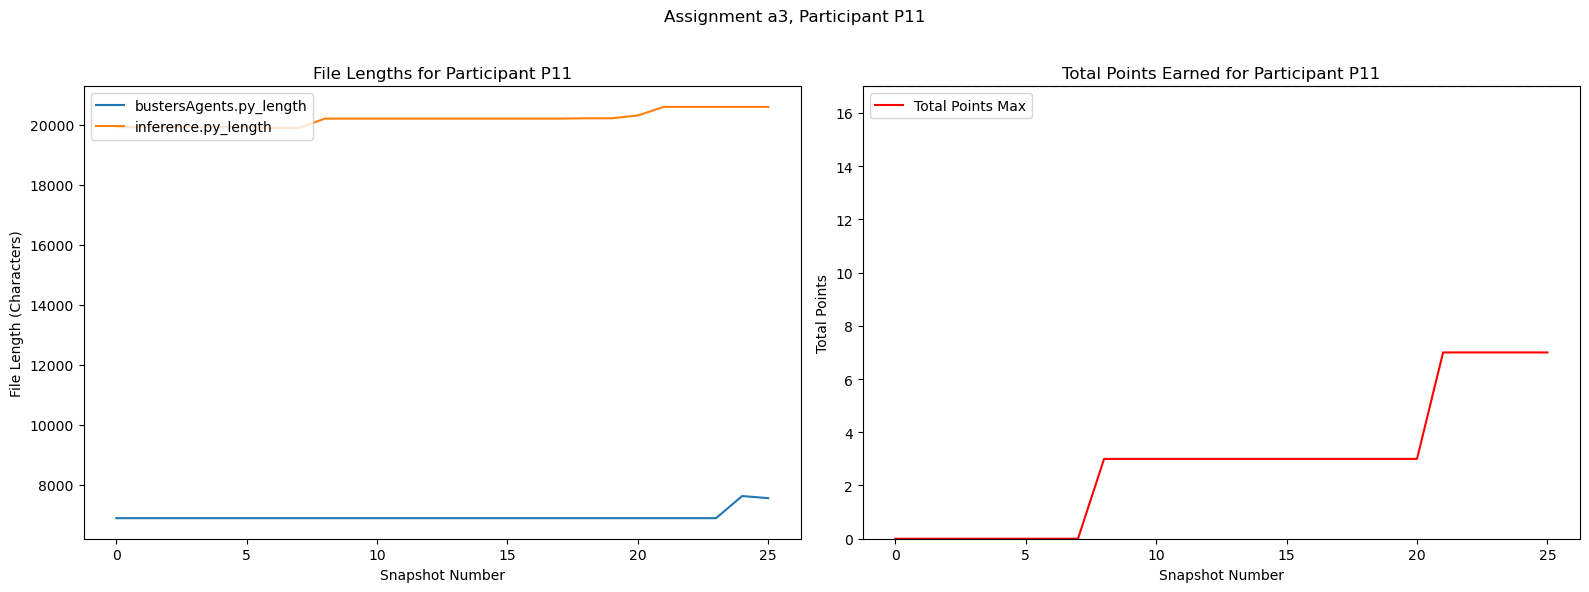

bustersAgents.py_length inference.py_length


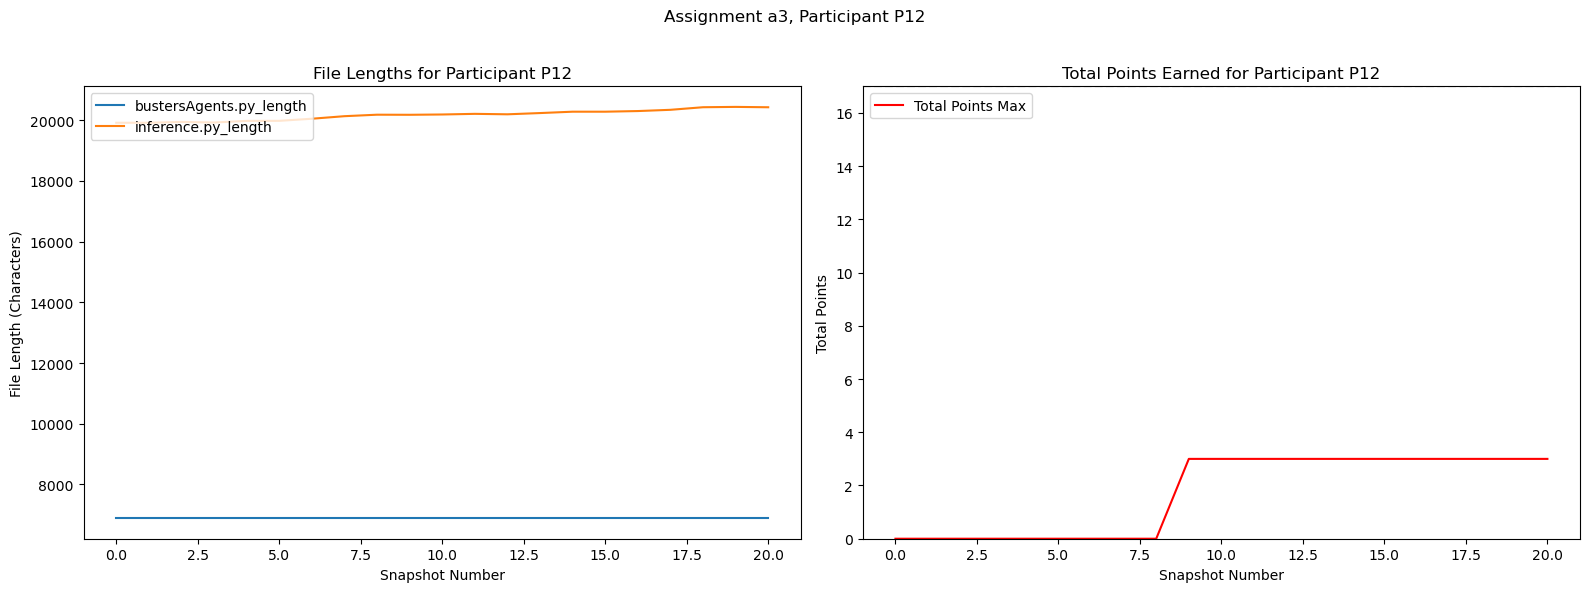

bustersAgents.py_length inference.py_length


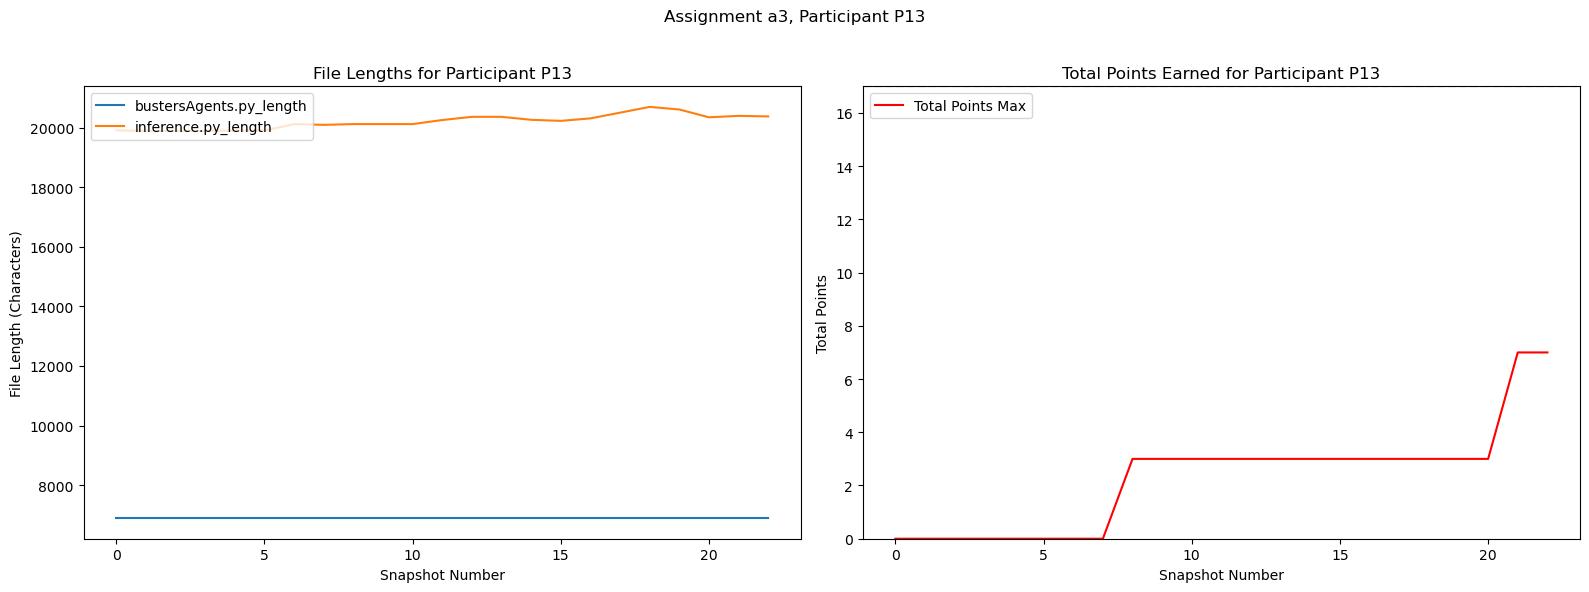

bustersAgents.py_length inference.py_length


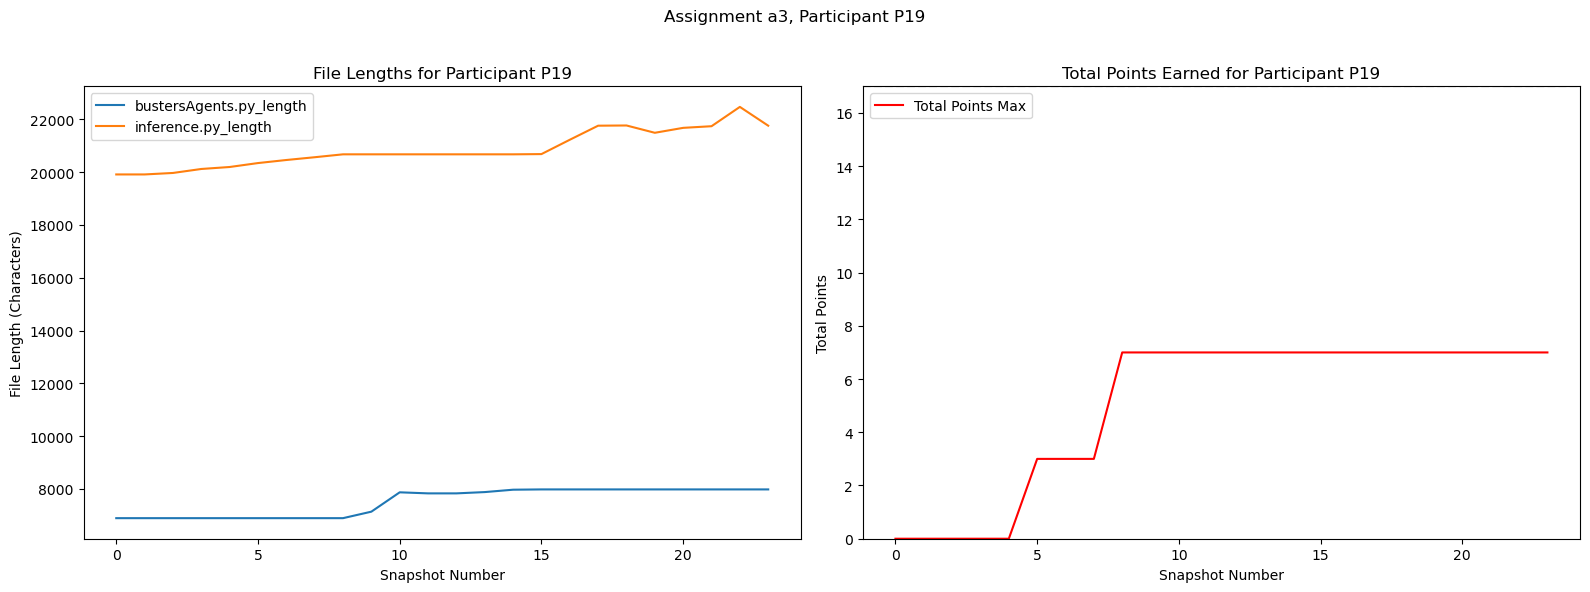

bustersAgents.py_length inference.py_length


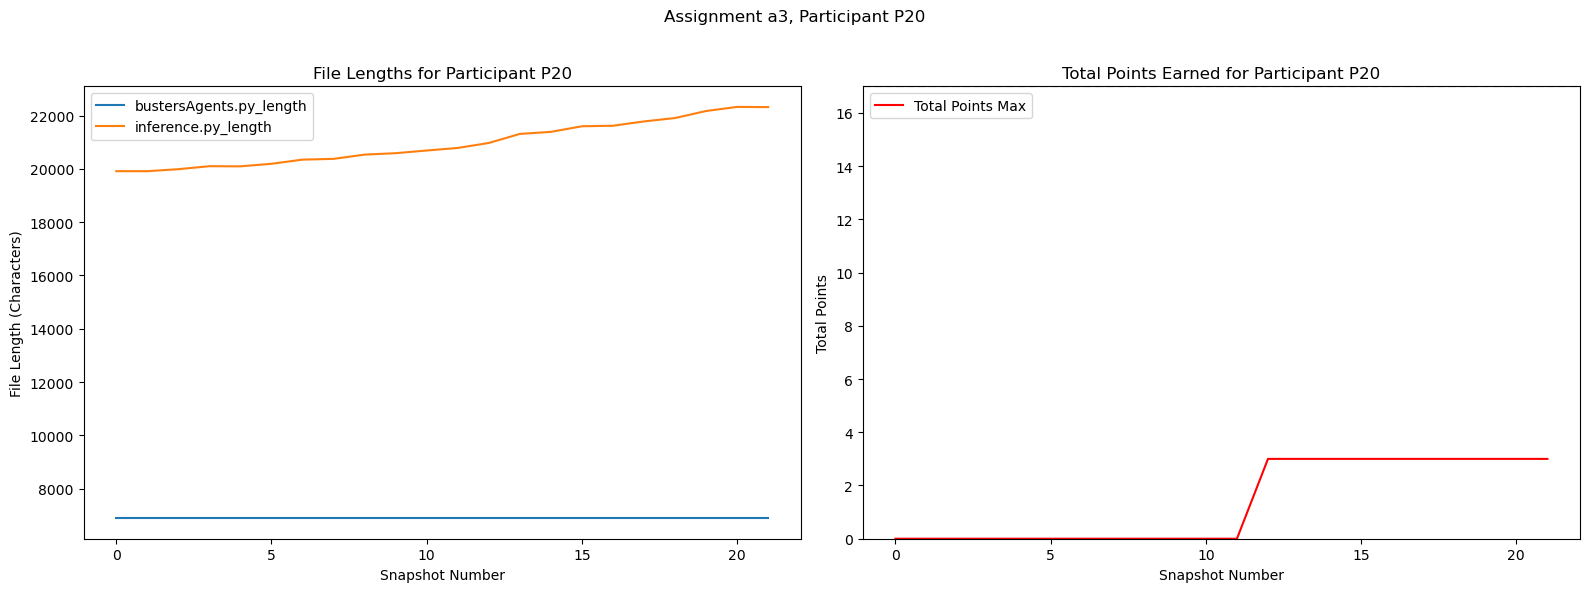

bustersAgents.py_length inference.py_length


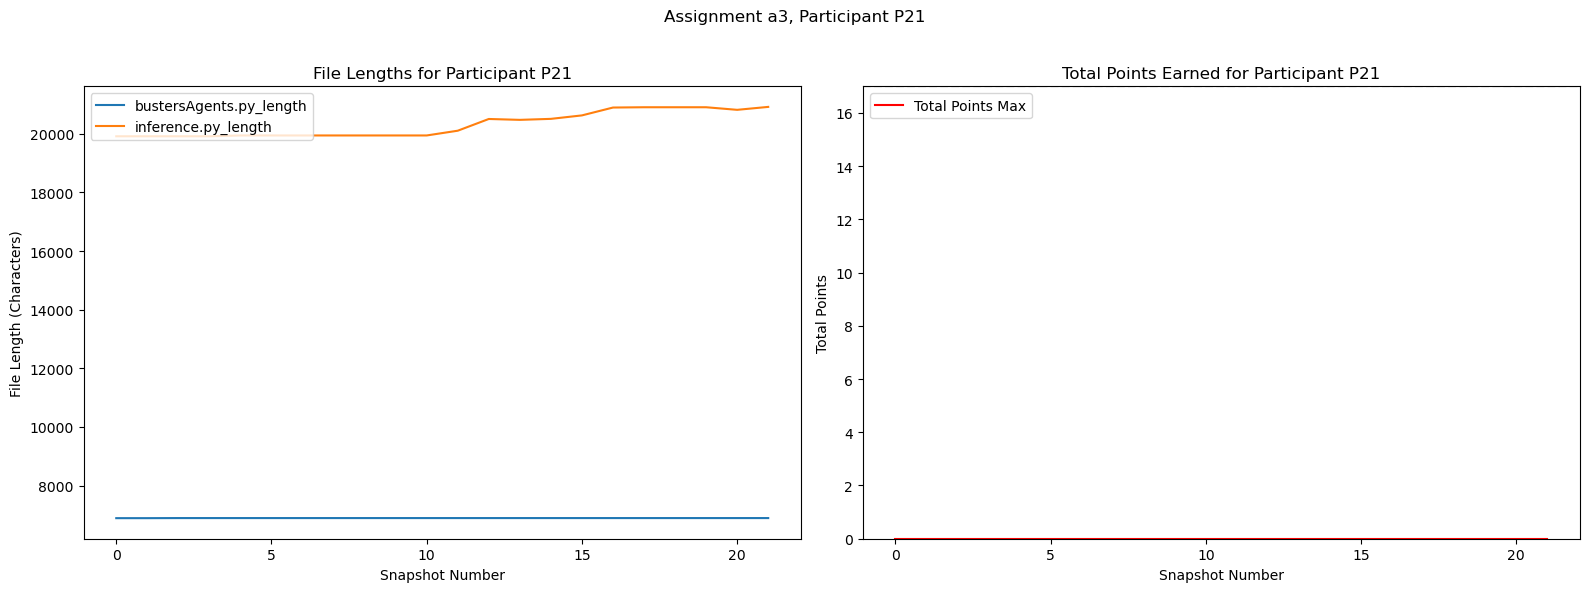

bustersAgents.py_length inference.py_length


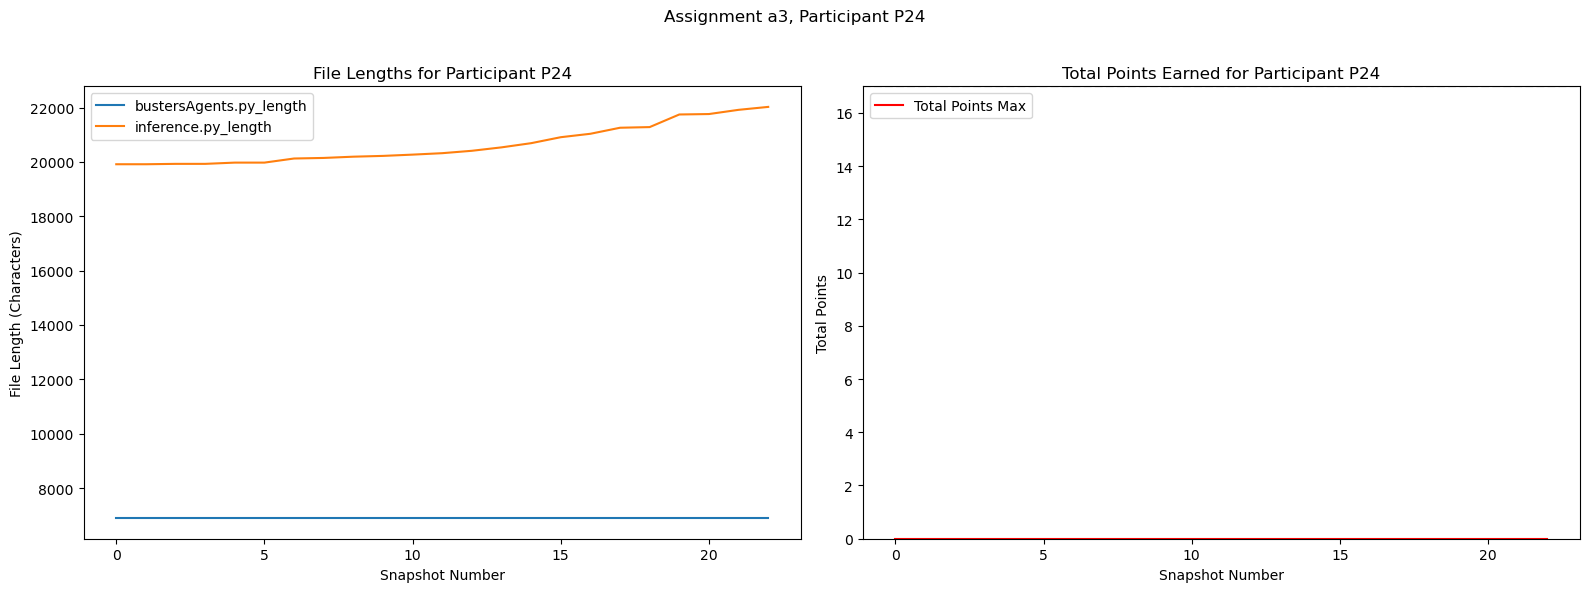

bustersAgents.py_length inference.py_length


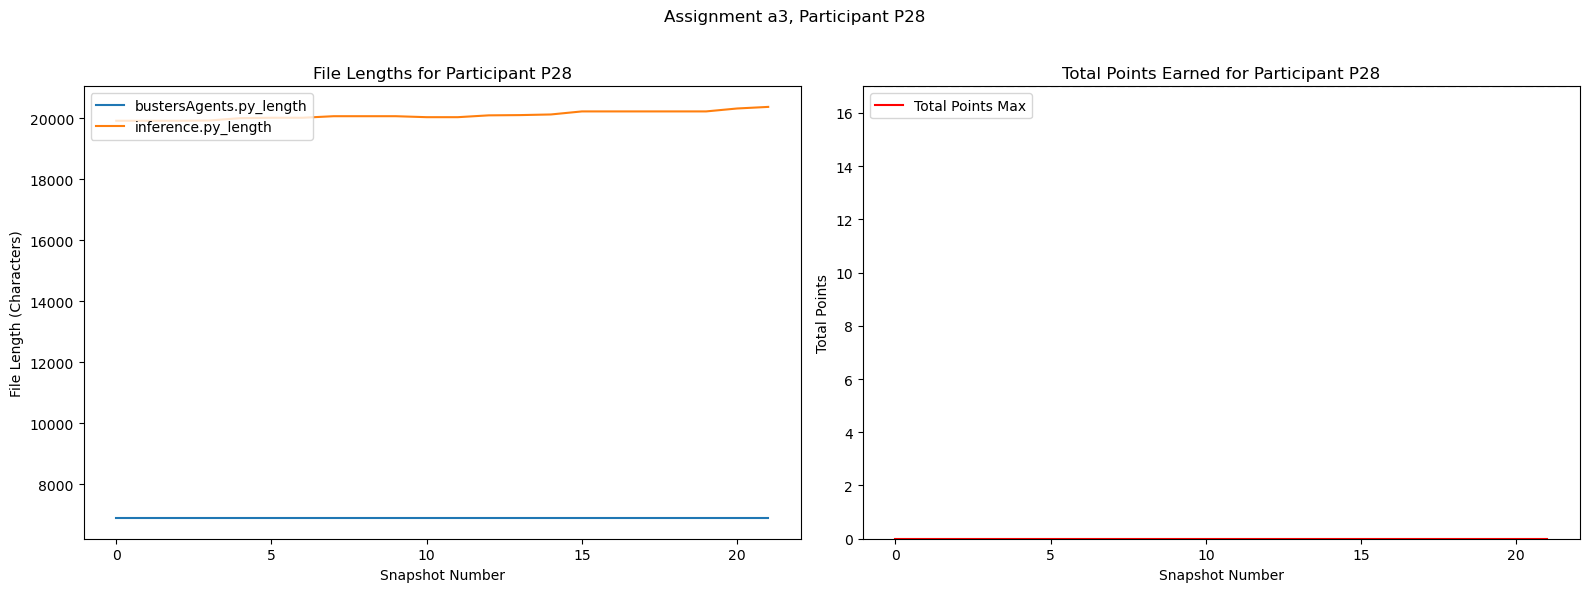

bustersAgents.py_length inference.py_length


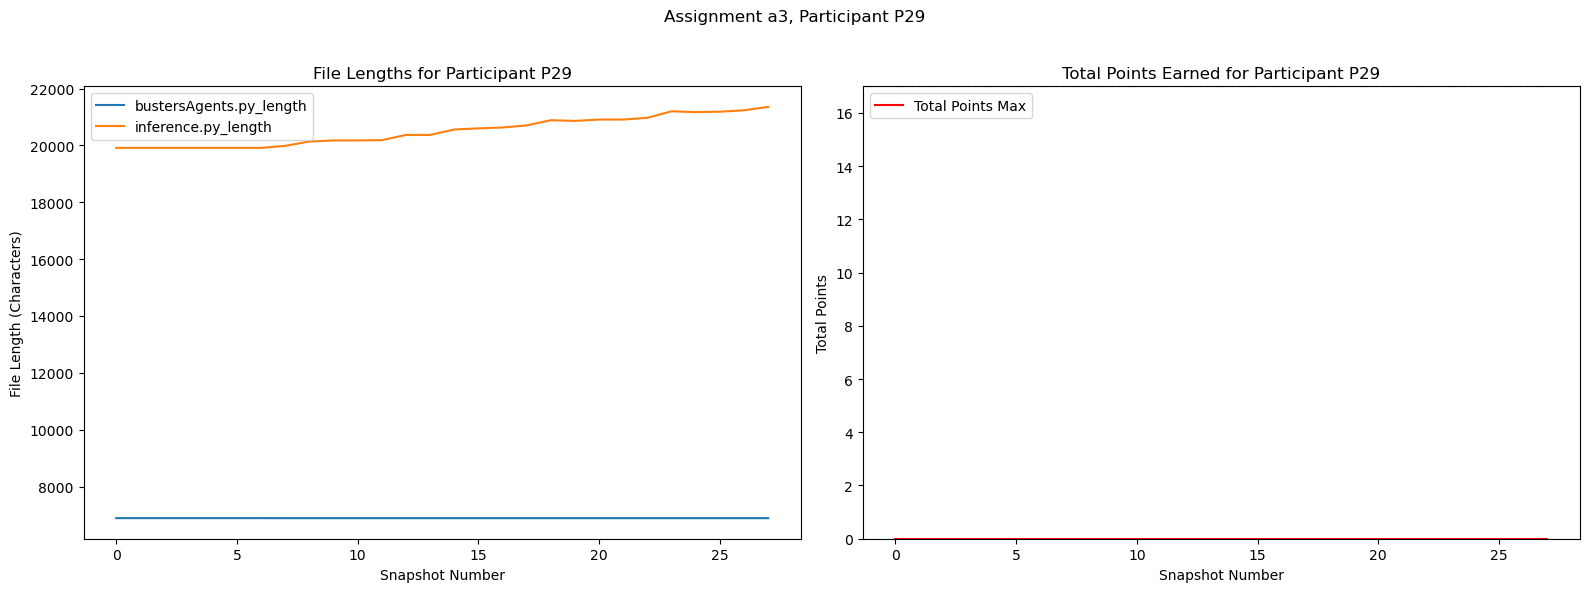

bustersAgents.py_length inference.py_length


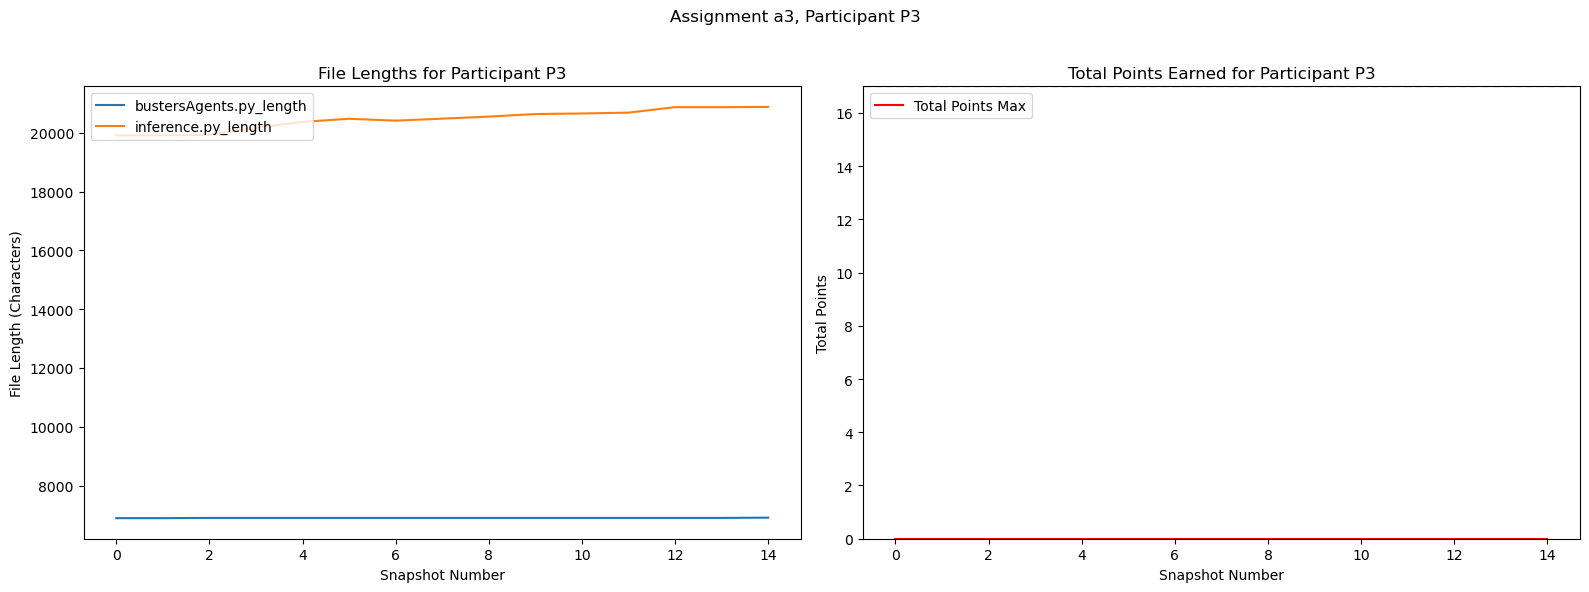

bustersAgents.py_length inference.py_length


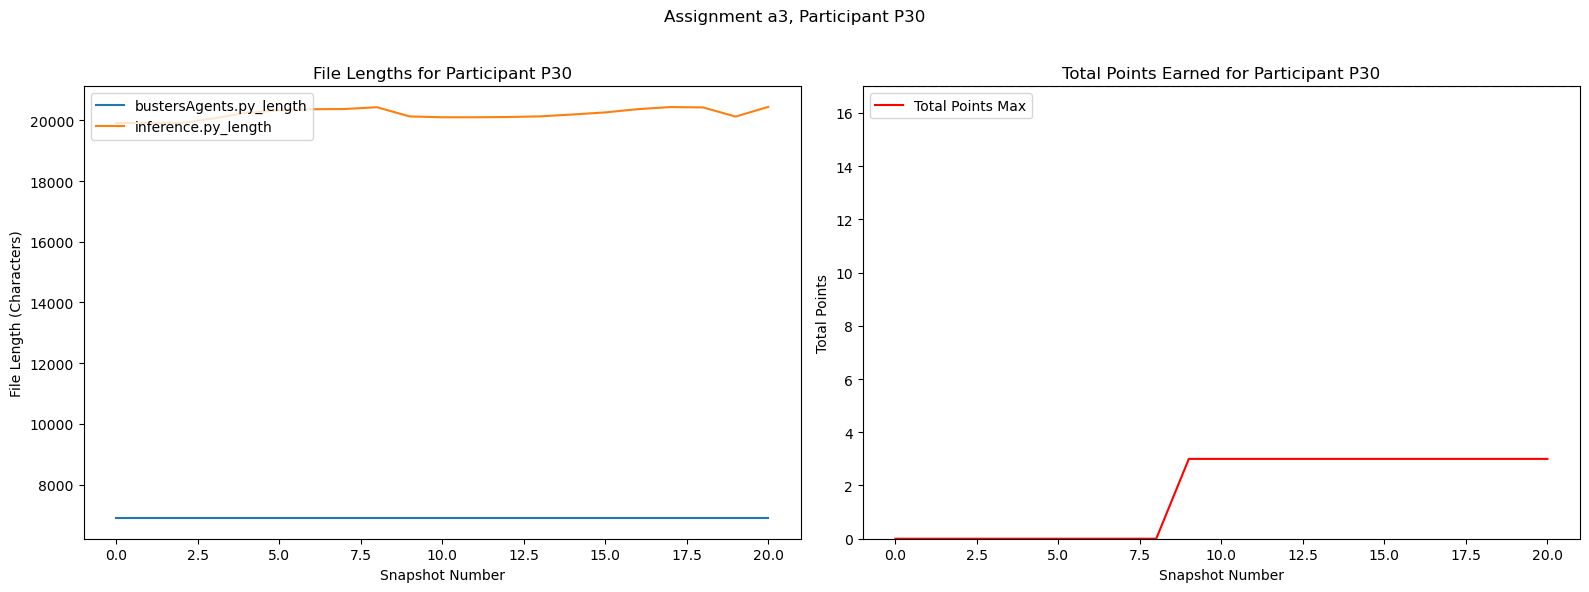

bustersAgents.py_length inference.py_length


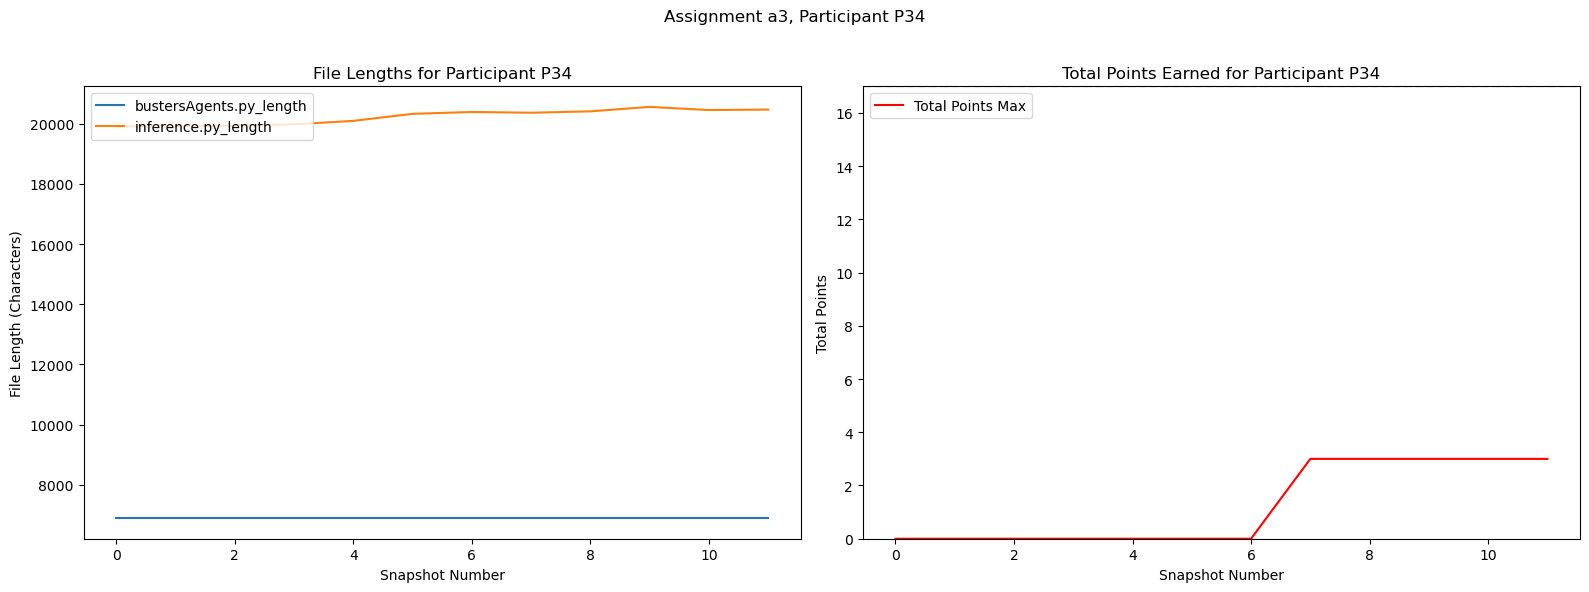

bustersAgents.py_length inference.py_length


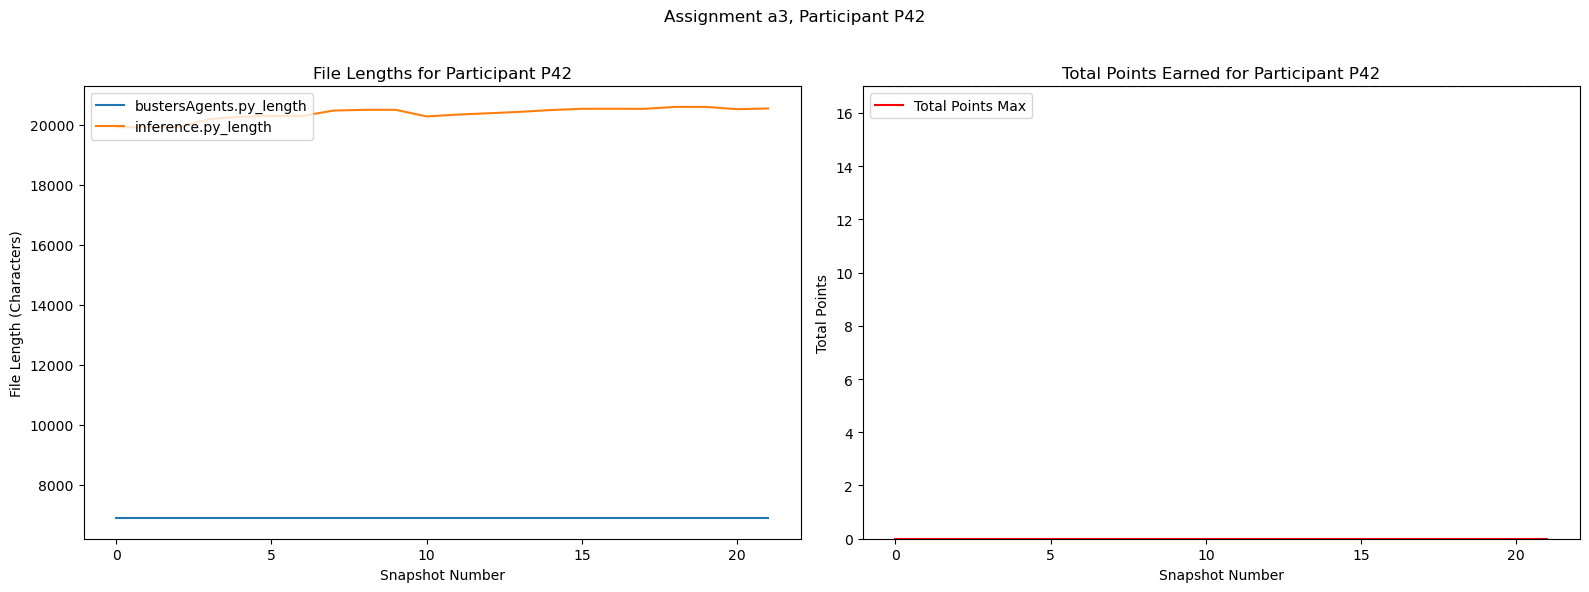

bustersAgents.py_length inference.py_length


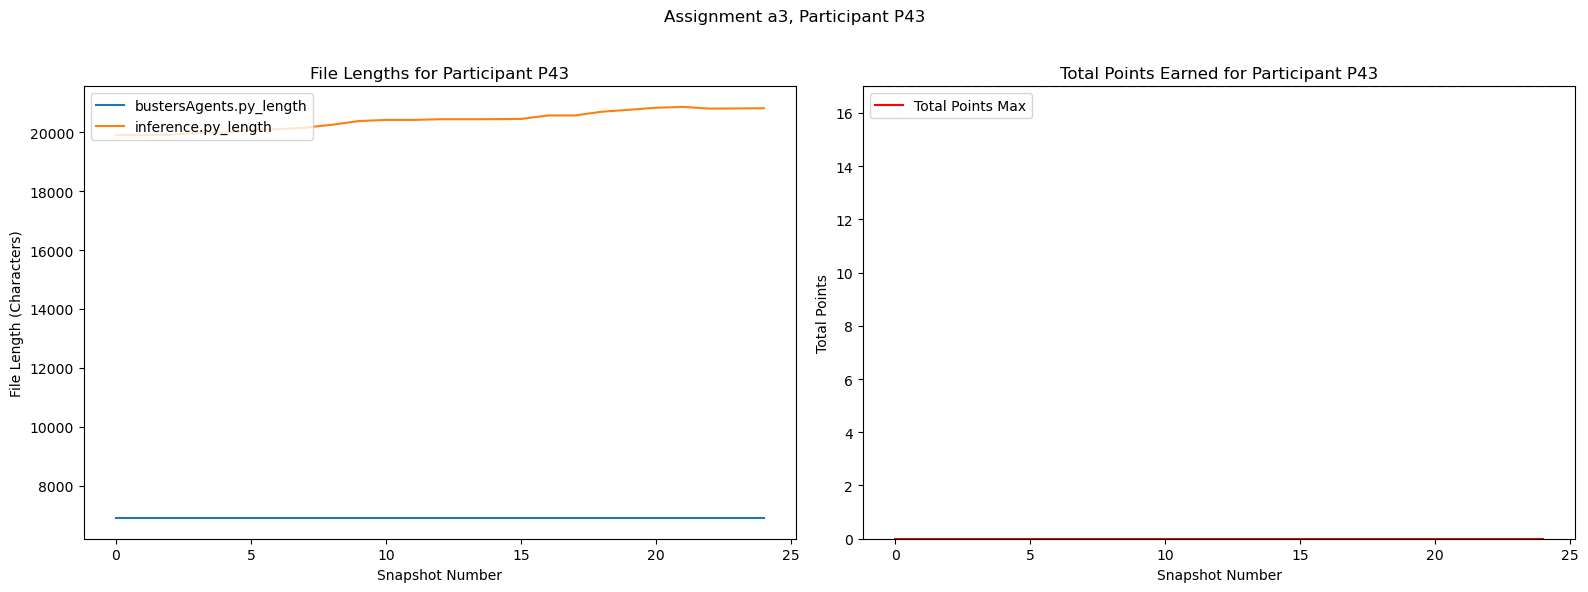

bustersAgents.py_length inference.py_length


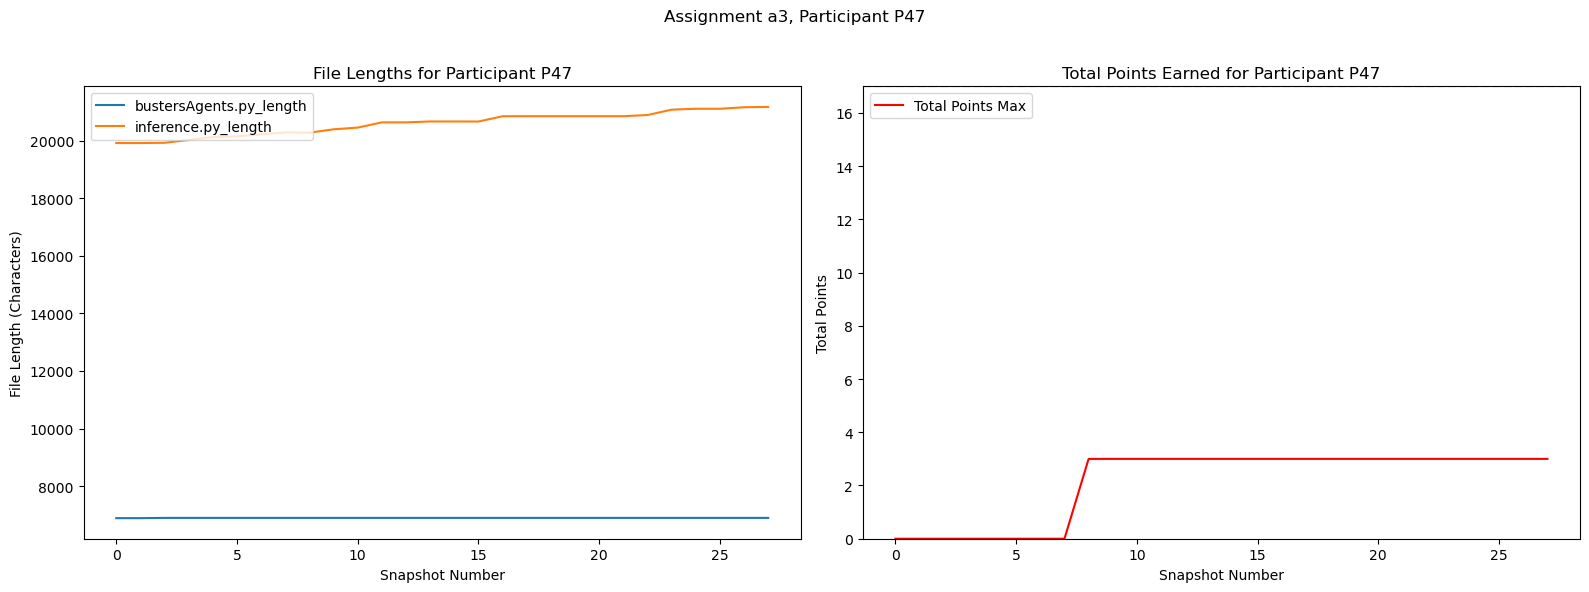

bustersAgents.py_length inference.py_length


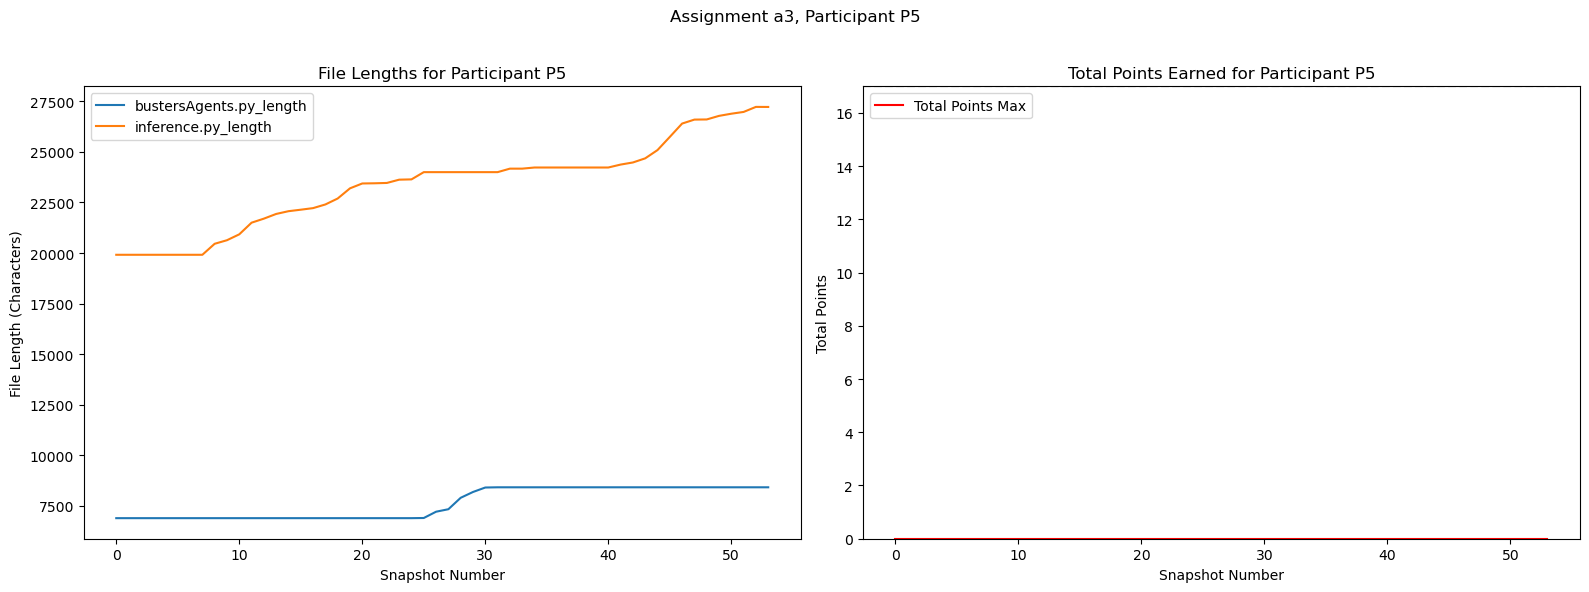

bustersAgents.py_length inference.py_length


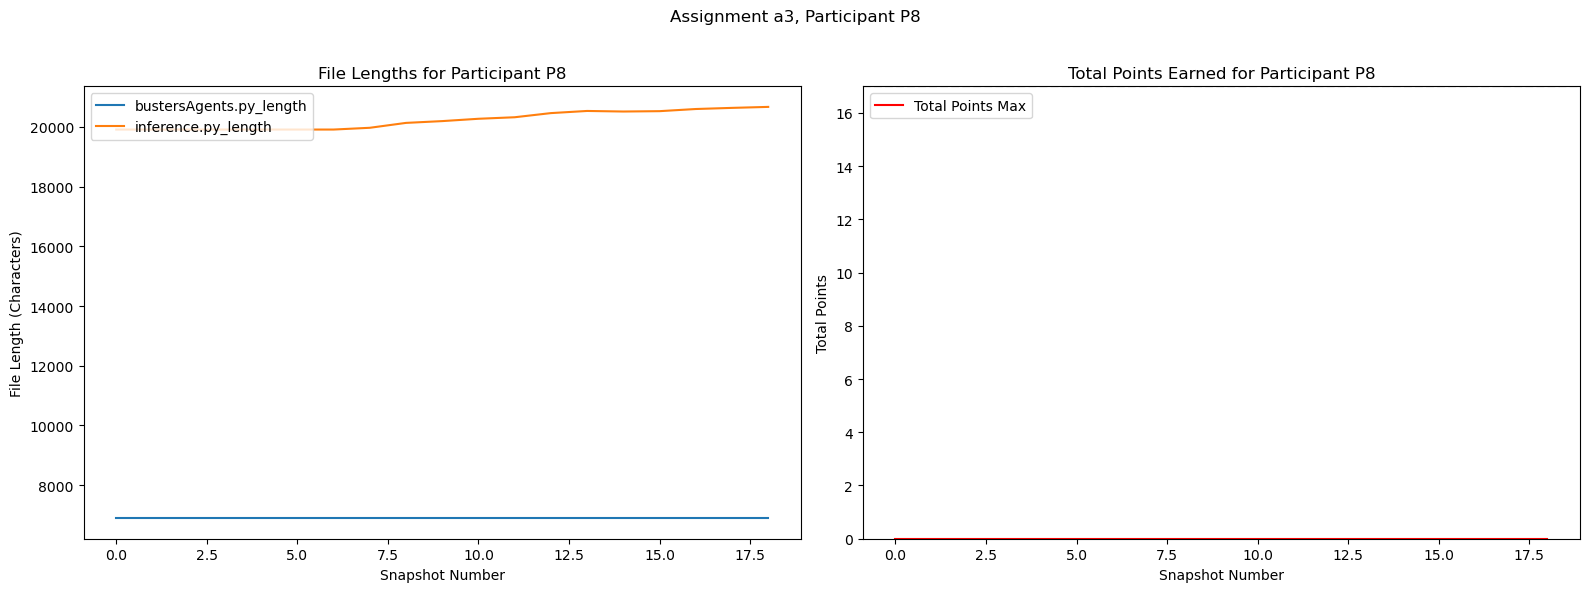

bustersAgents.py_length inference.py_length


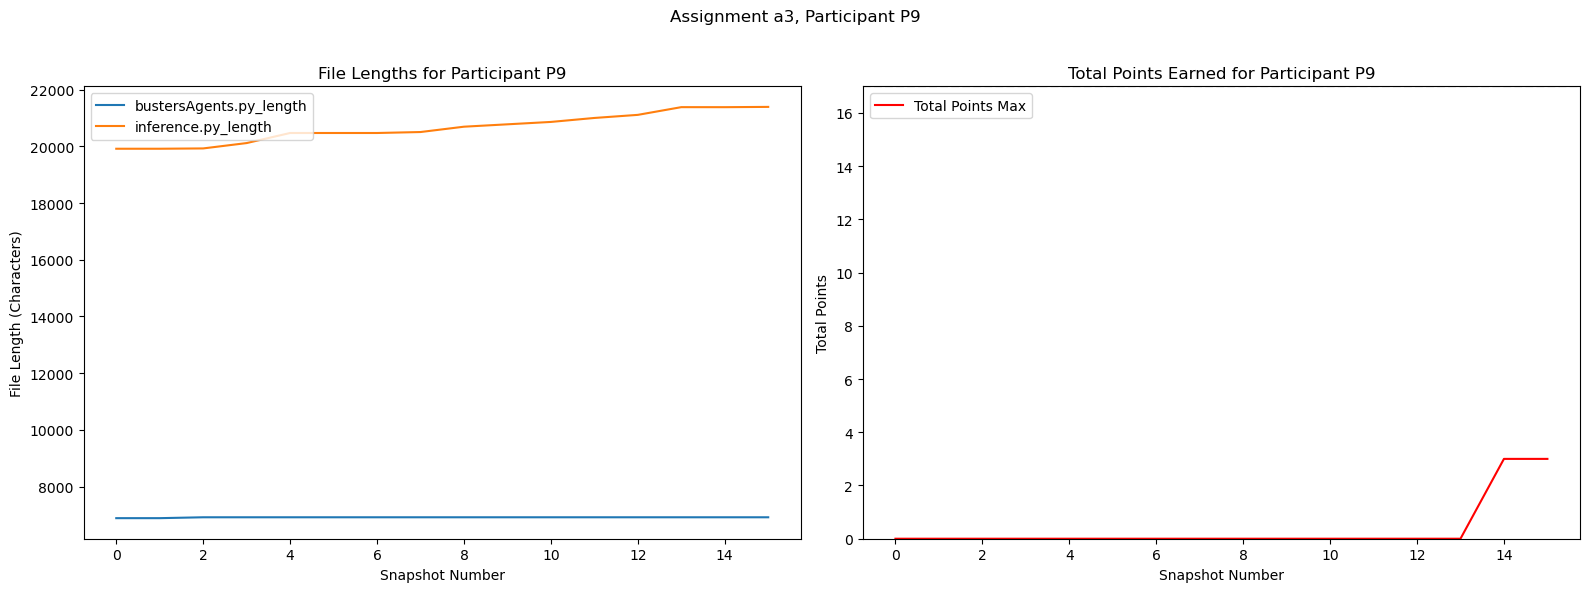

In [109]:
plot_keylogger_results(df_a3, a3=True, plot_lengths=True)

In [113]:
df_a4

participant  snapshot  NeuralNet.py_compiles  NeuralNetUtil.py_compiles  \
0           P11         0                      1                          1   
1           P11         1                      1                          1   
2           P11         2                      1                          1   
3           P11         3                      1                          1   
4           P11         4                      1                          1   
..          ...       ...                    ...                        ...   
317          P9        18                      0                          1   
318          P9        19                      0                          1   
319          P9        20                      0                          1   
320          P9        21                      0                          1   
321          P9        22                      0                          1   

     NeuralNet.py_length  NeuralNetUtil.py_length  q2_points  q1_points  \
0                  12685                     5474          0          0   
1                  12685                     5474          0          0   
2                  12685                     5474          0          0   
3                  12685                     5474          0          0   
4                  12685                     5474          0          0   
..                   ...                      ...        ...        ...   
317                13596                     5474          0          0   
318                13596                     5474          0          0   
319                13596                     5474          0          0   
320                13596                     5474          0          0   
321                13686                     5474          0          0   

     q3_points  q4_points  total_points  
0            0          0           0.0  
1            0          0           0.0  
2            0          0           0.0  
3            0          0           0.0  
4            0          0           0.0  
..         ...        ...           ...  
317          0          0           0.0  
318          0          0           0.0  
319          0          0           0.0  
320          0          0           0.0  
321          0          0           0.0  

[322 rows x 11 columns]

NeuralNet.py_length NeuralNetUtil.py_length


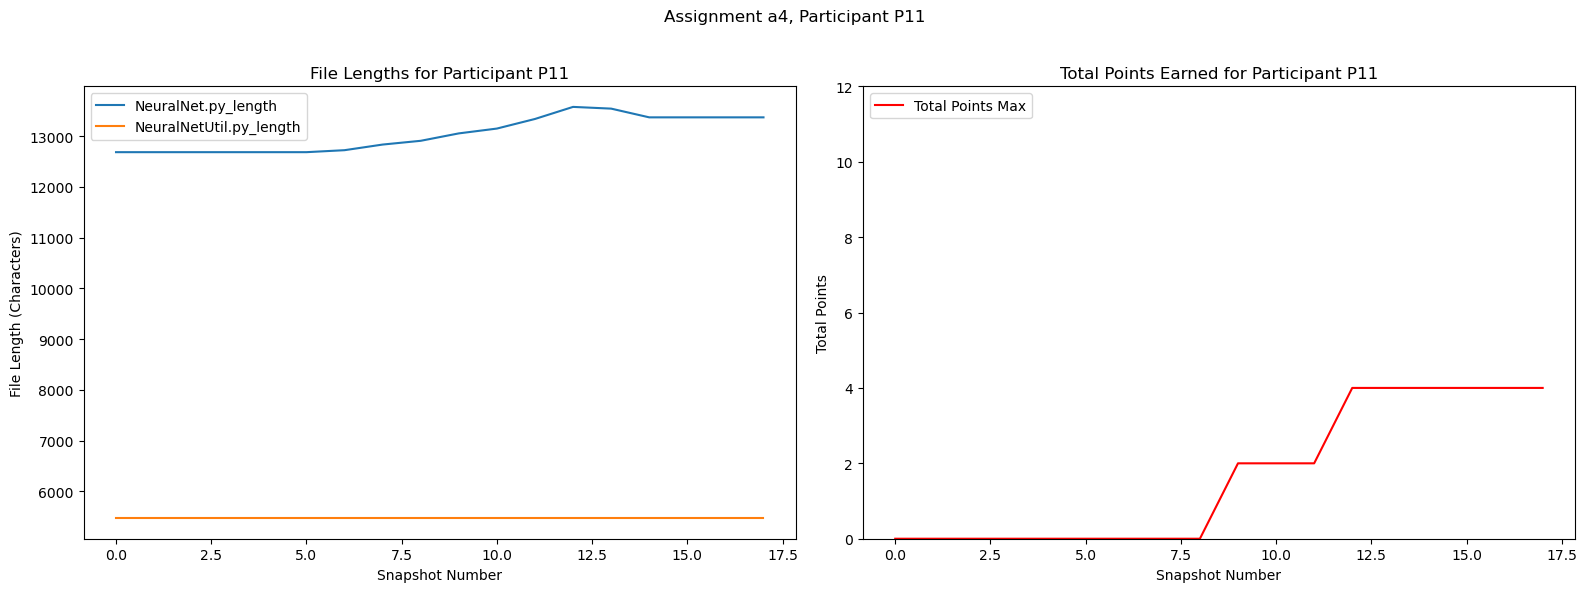

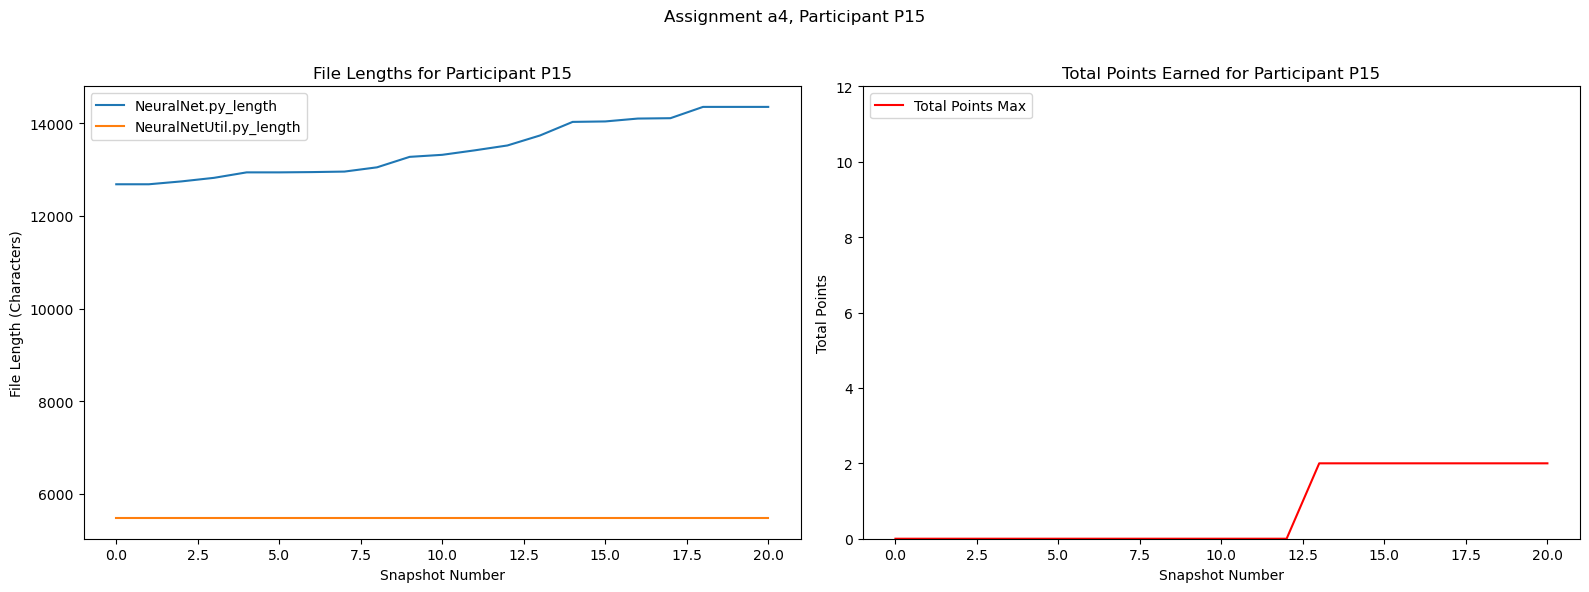

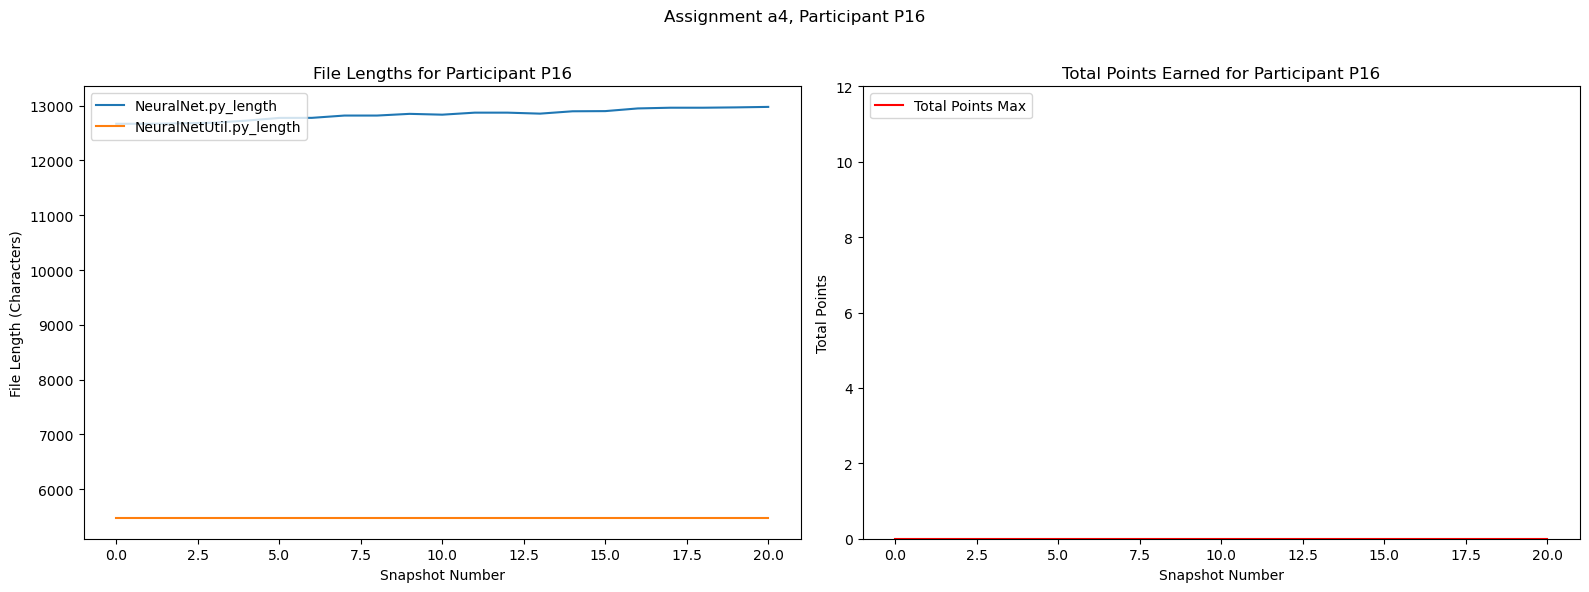

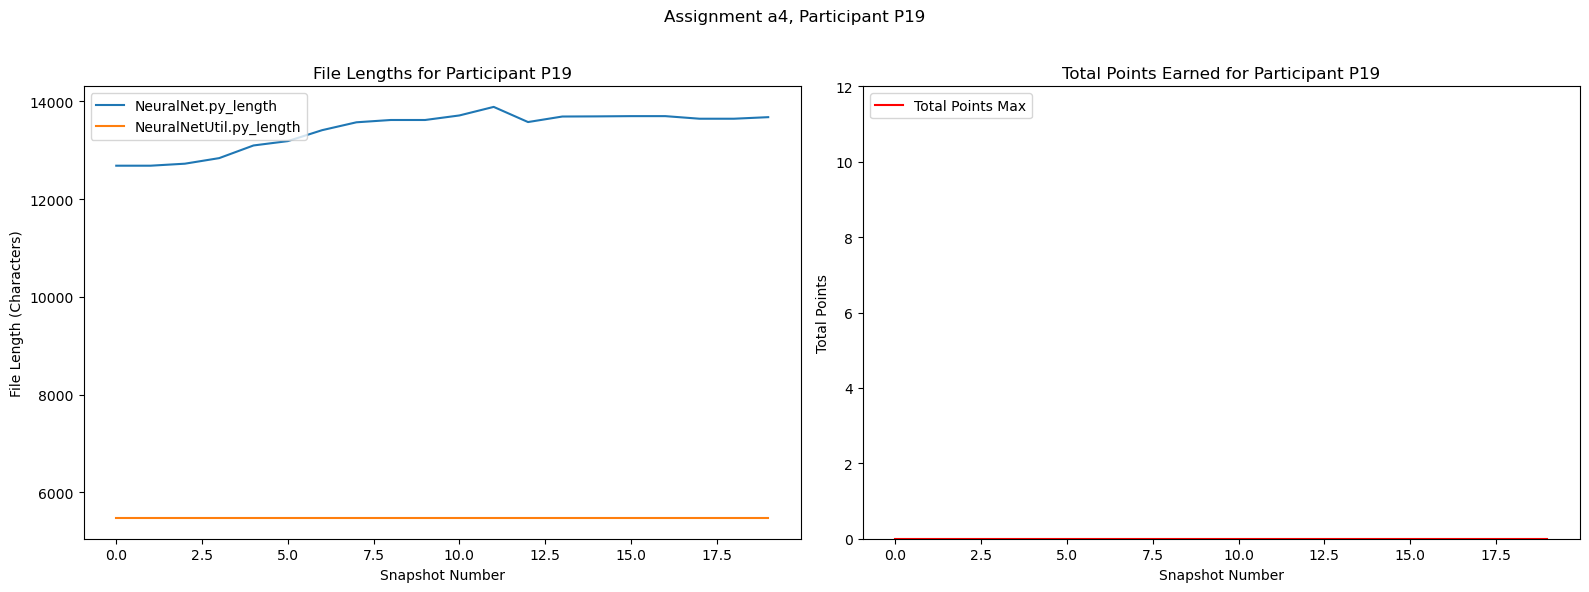

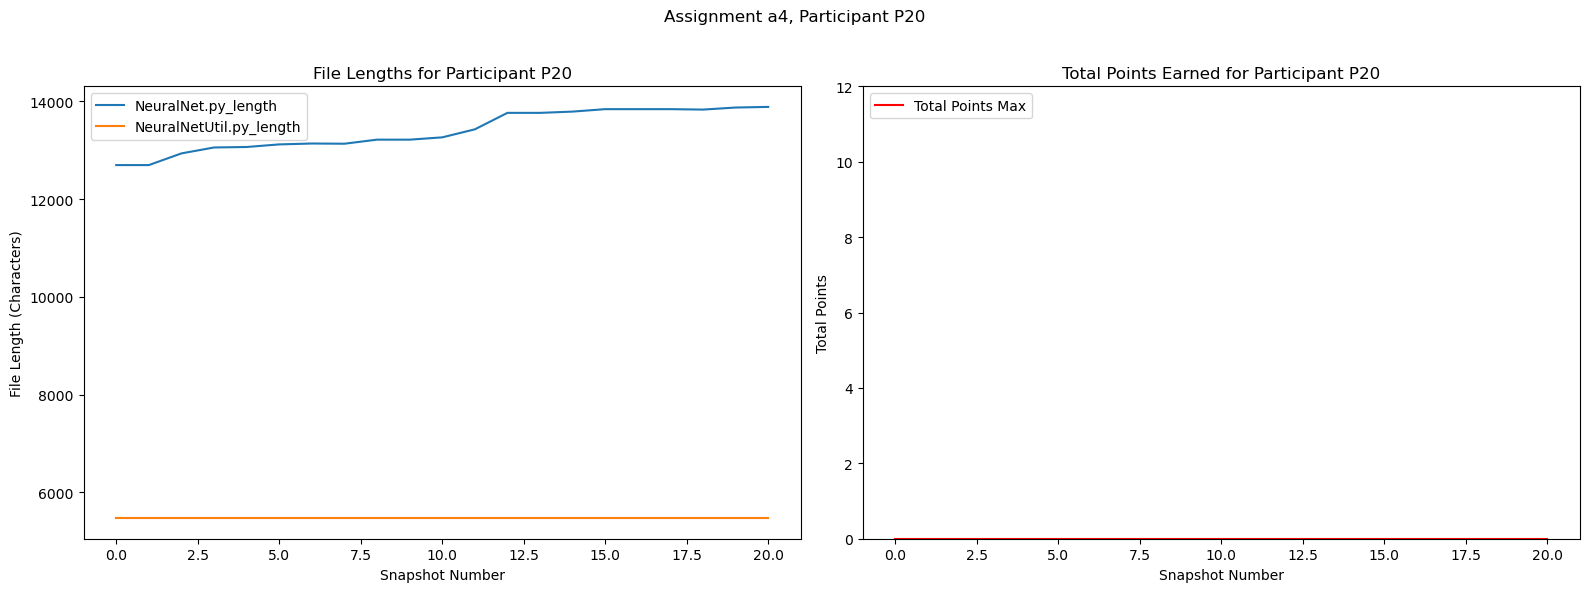

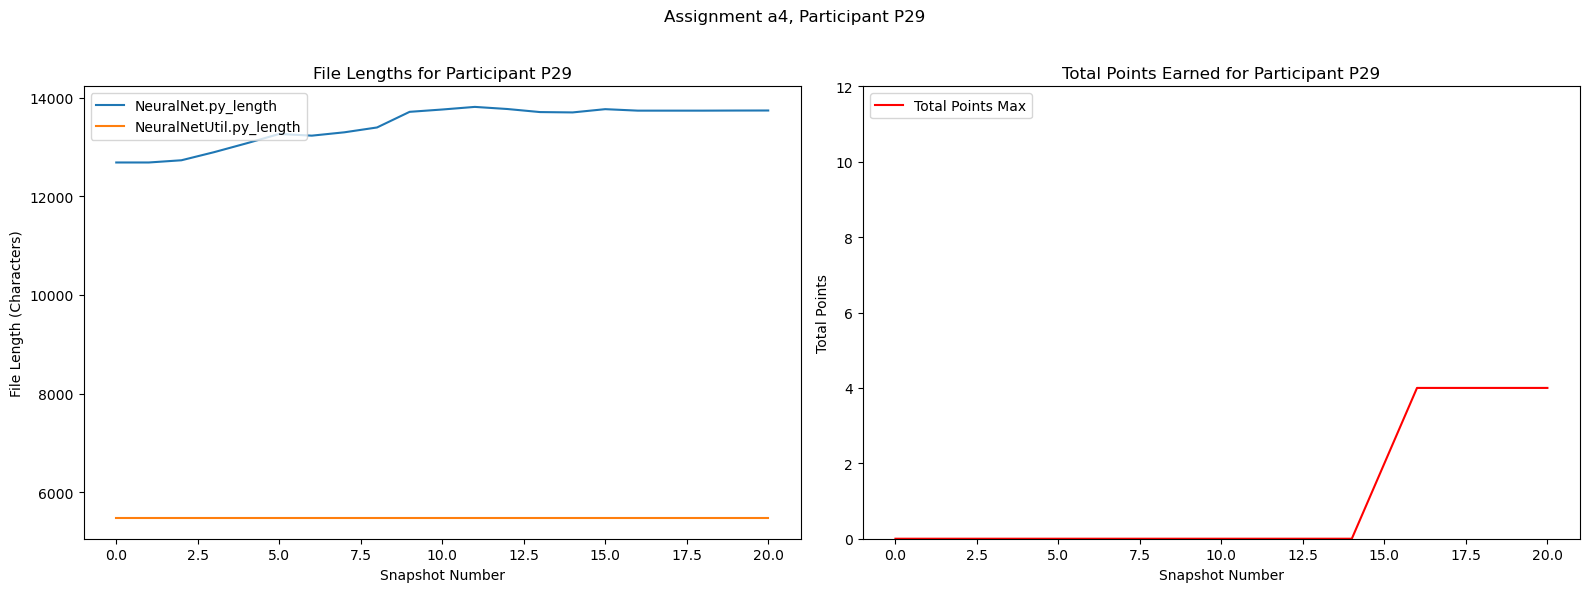

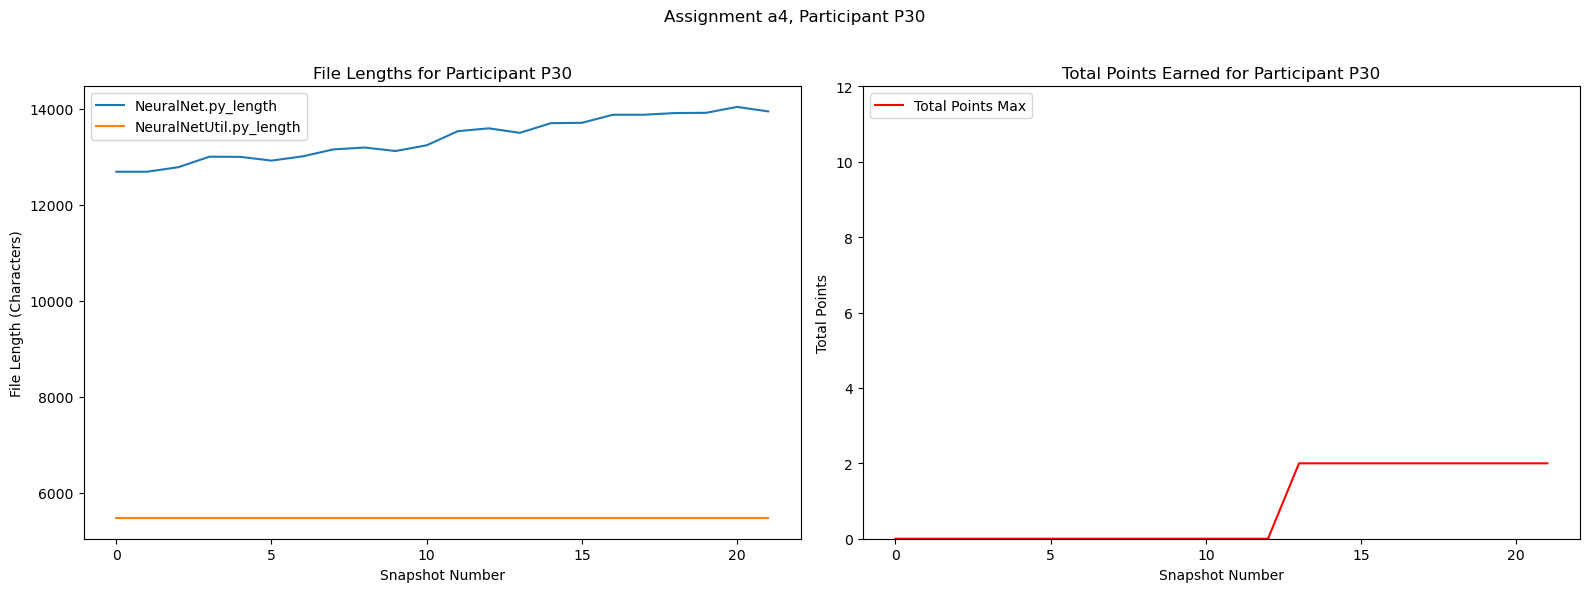

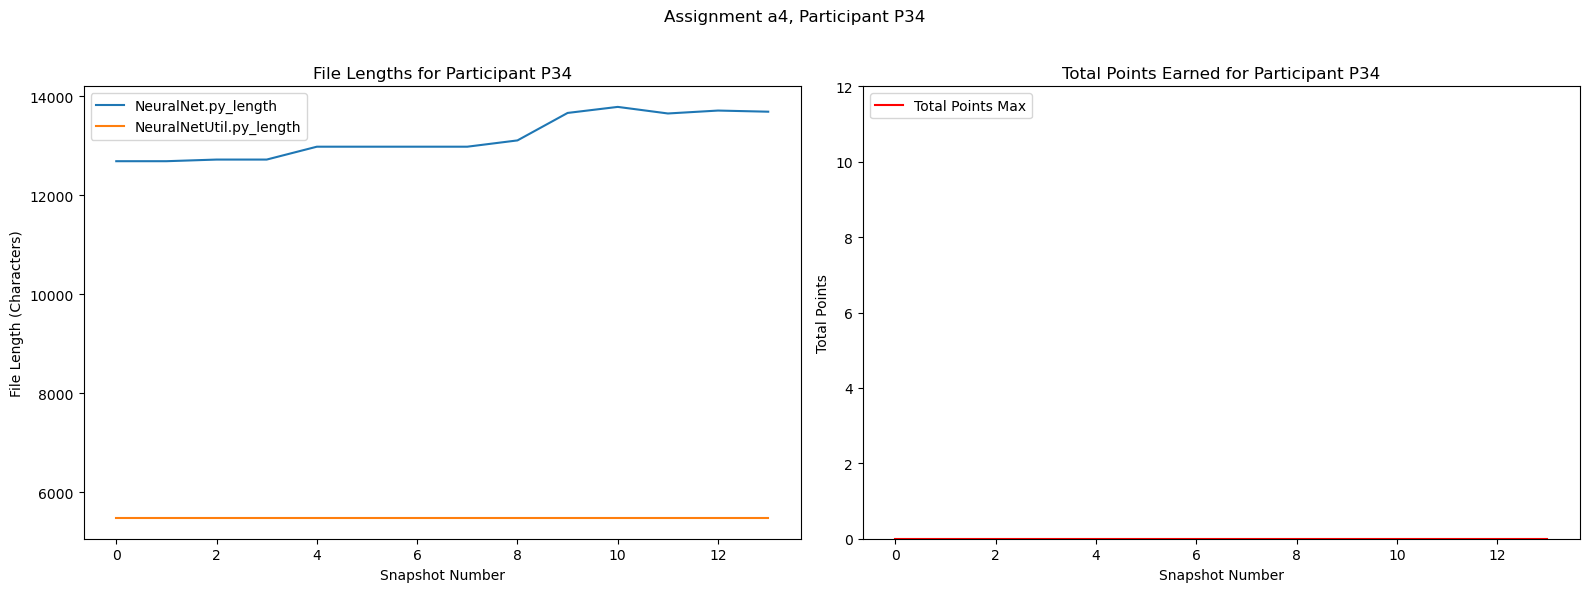

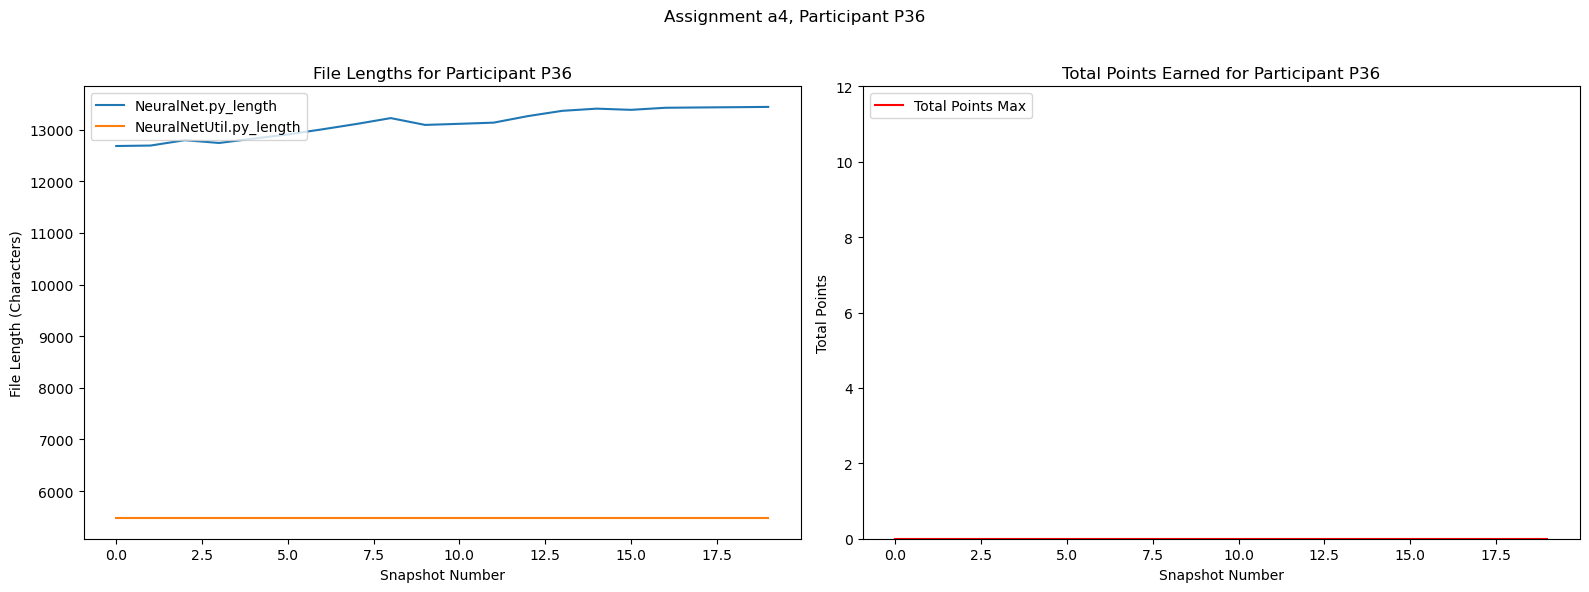

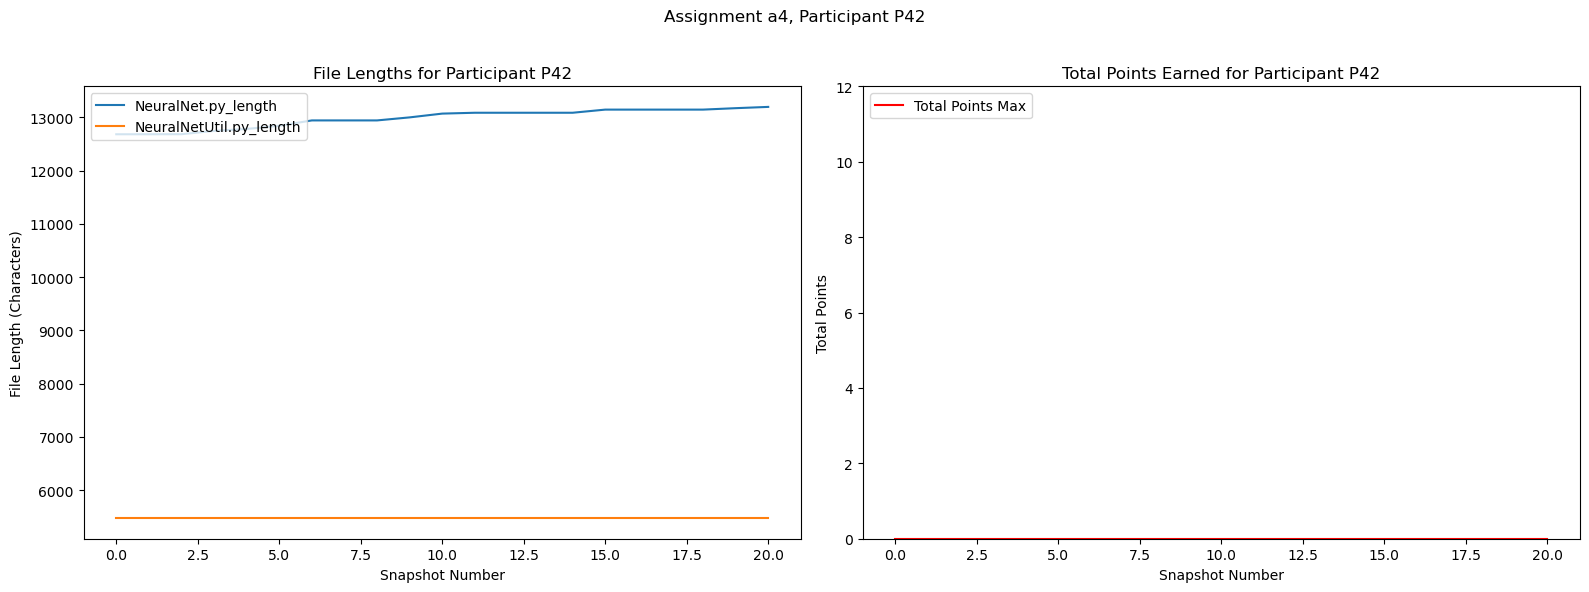

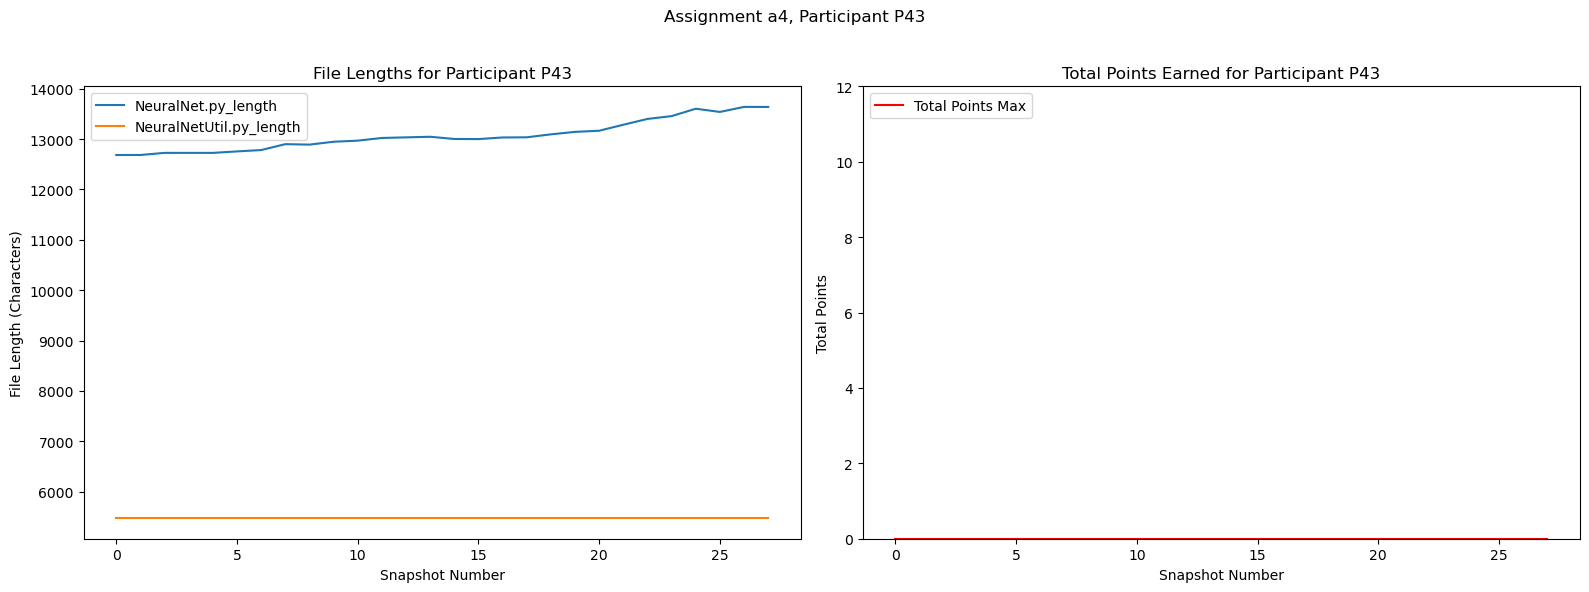

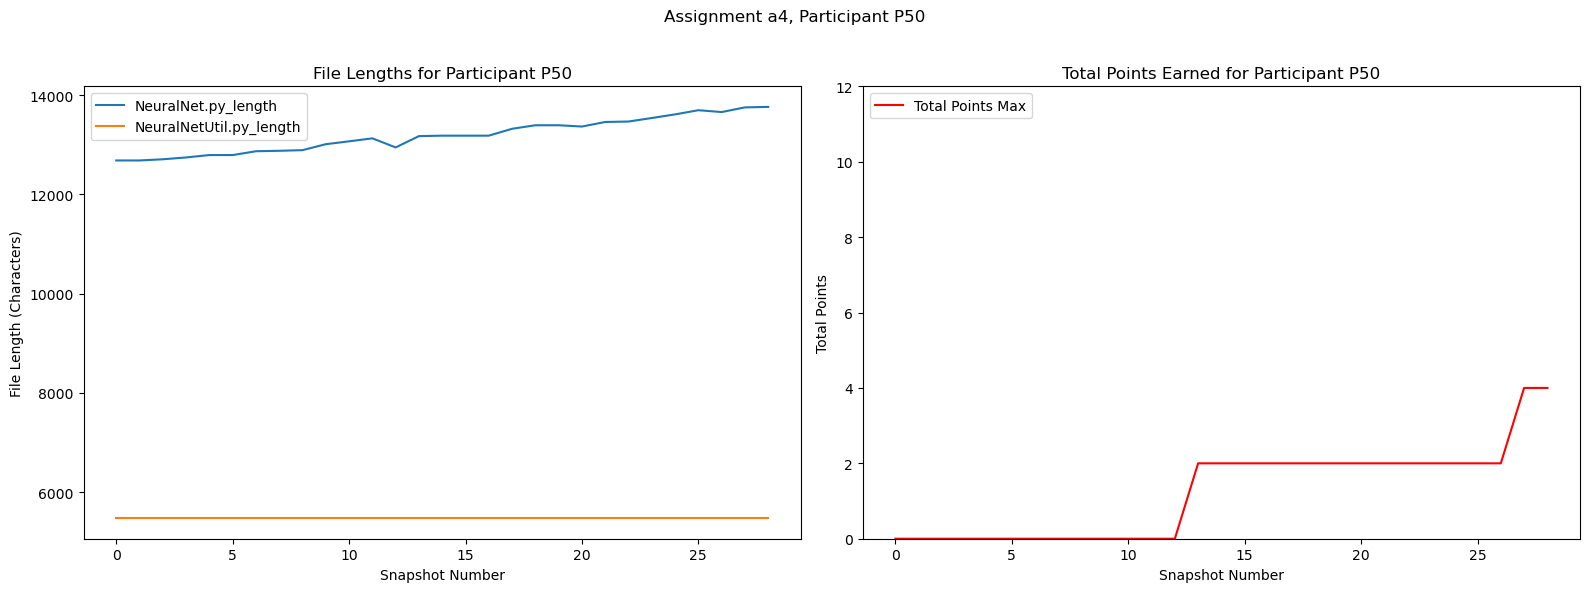

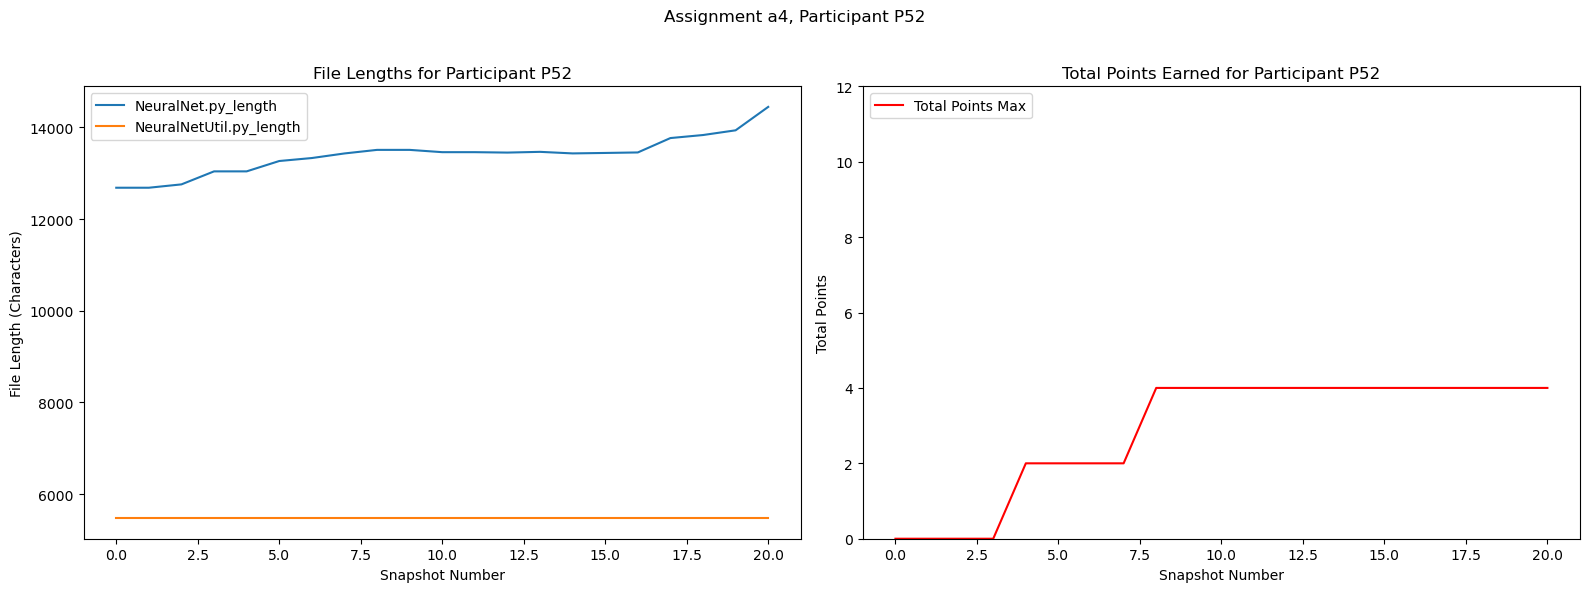

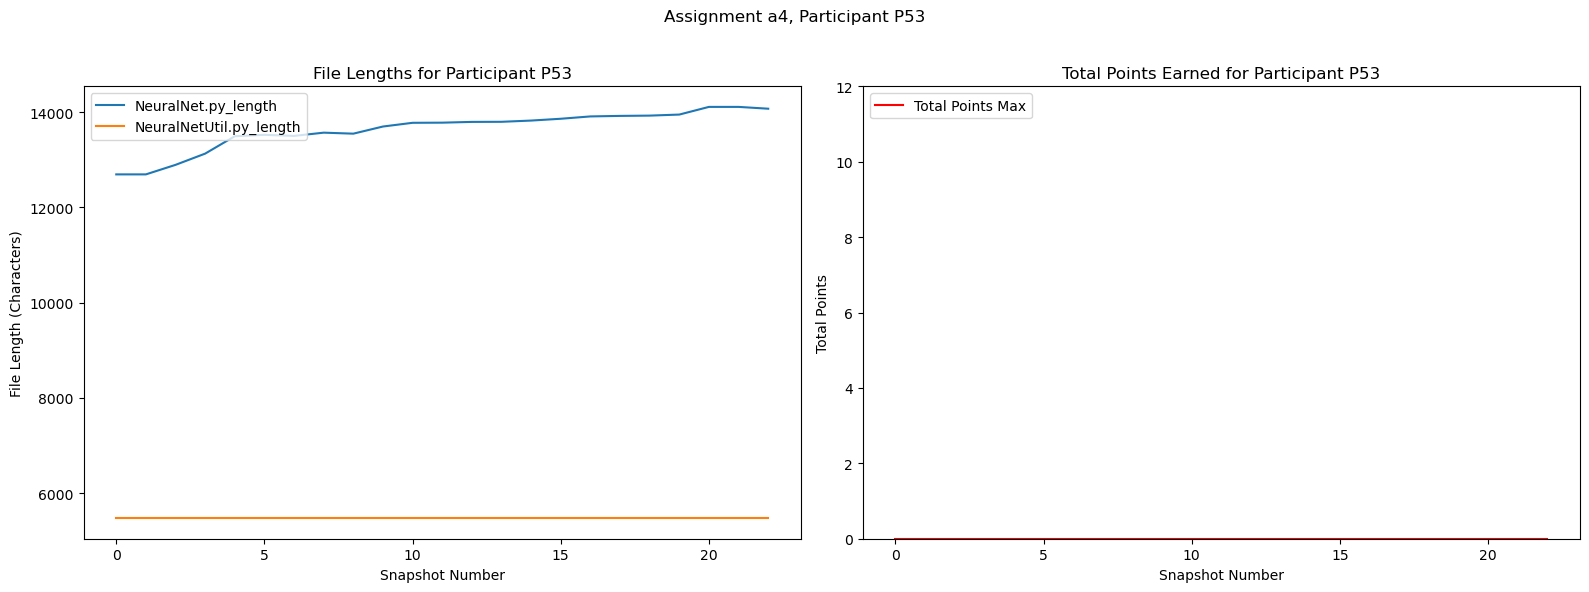

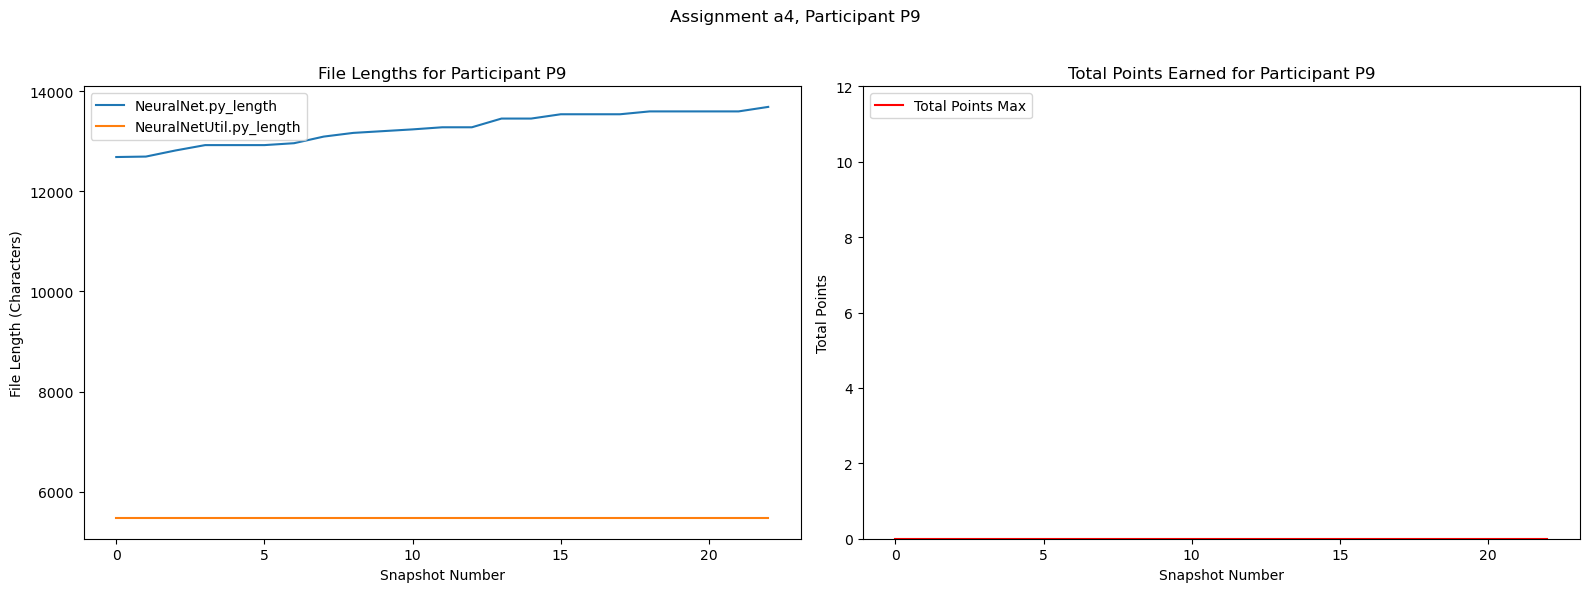

In [116]:
plot_keylogger_results(df_a4, a3=False, plot_lengths=True)

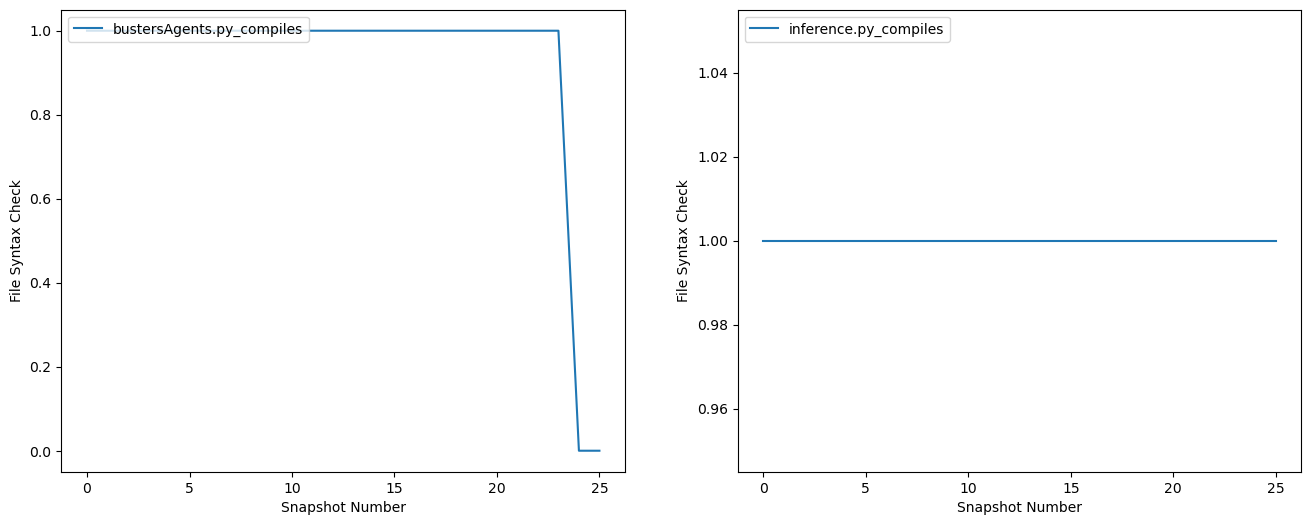

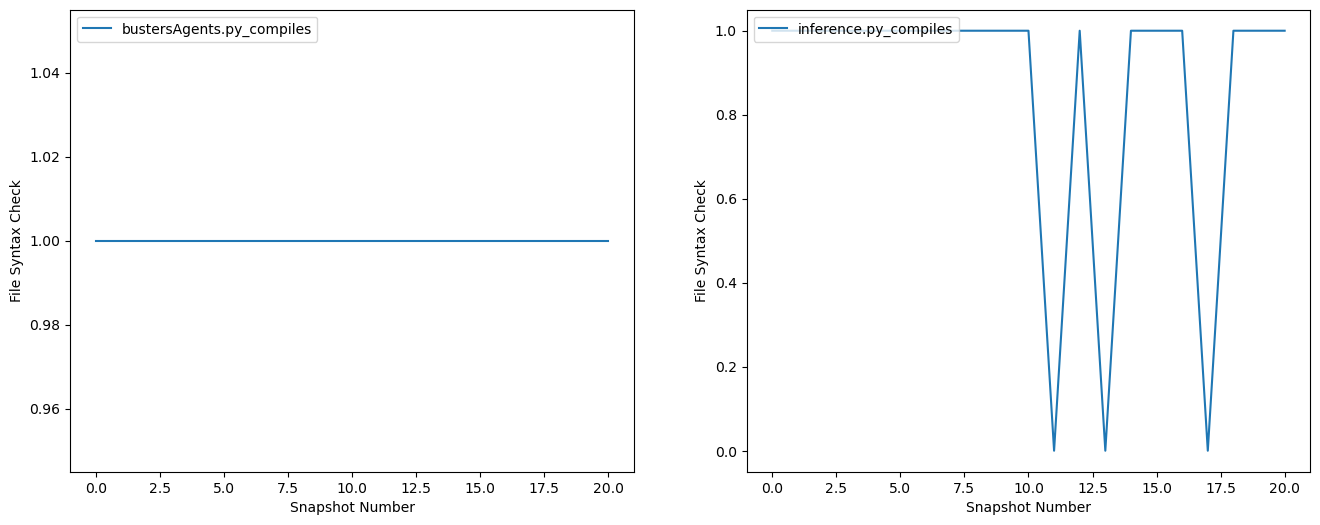

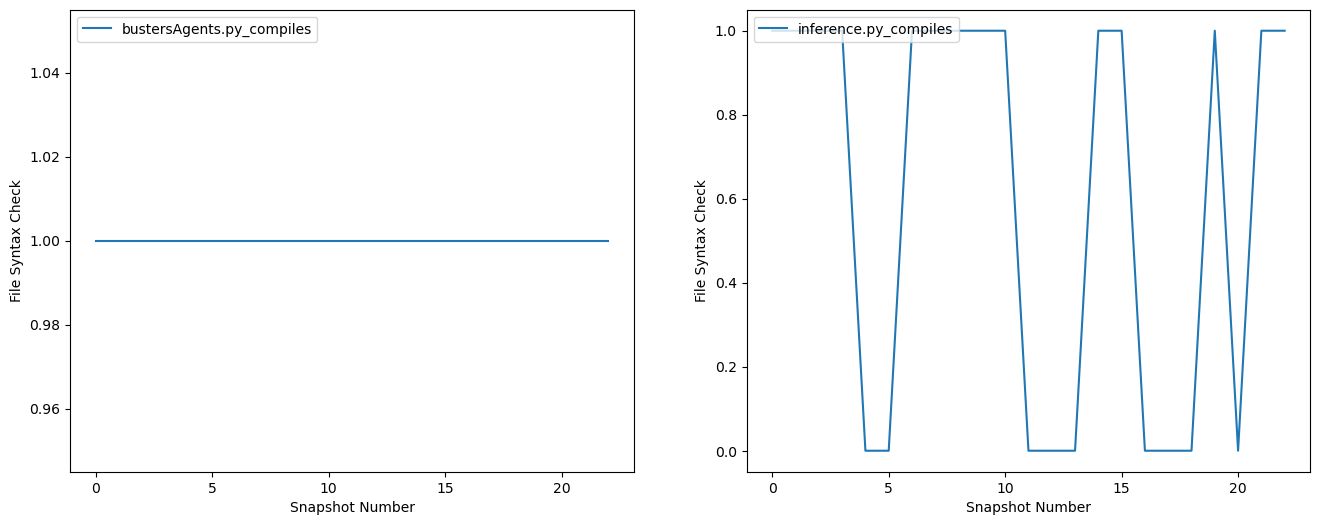

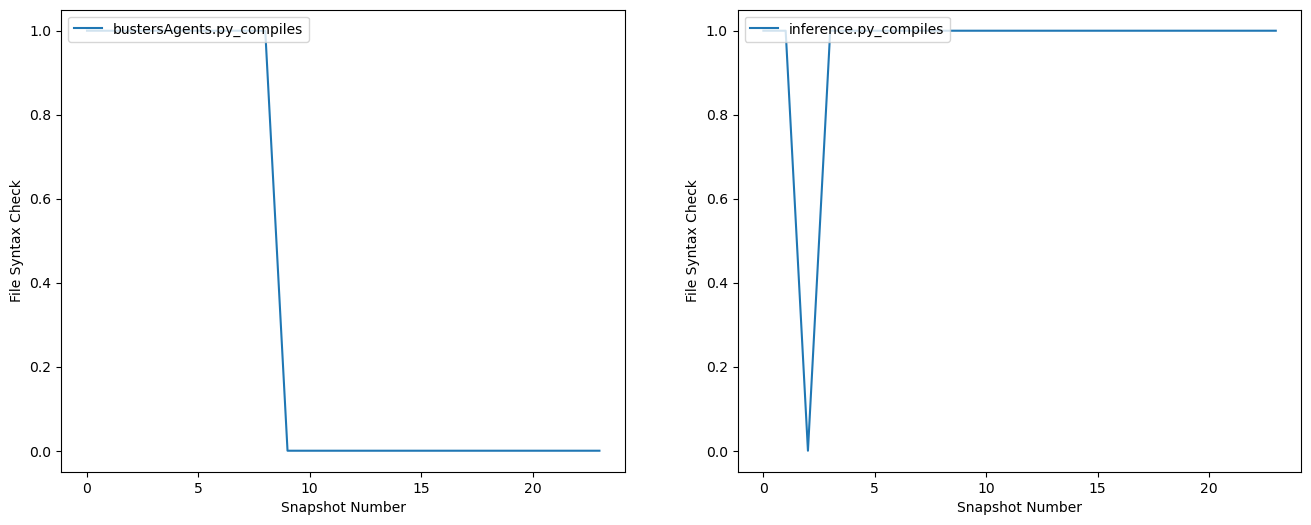

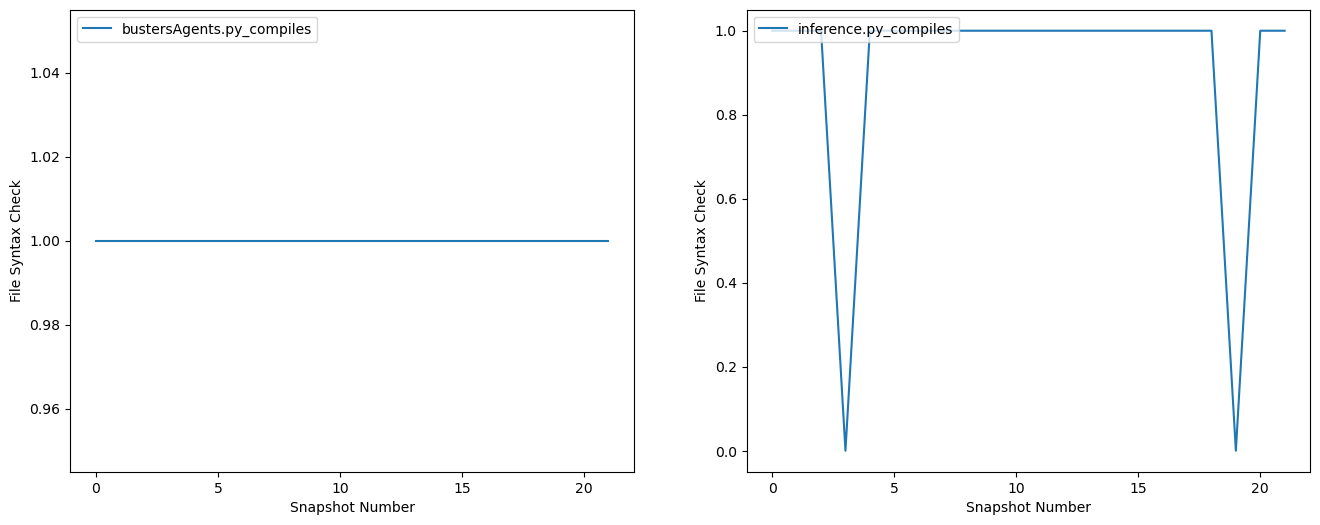

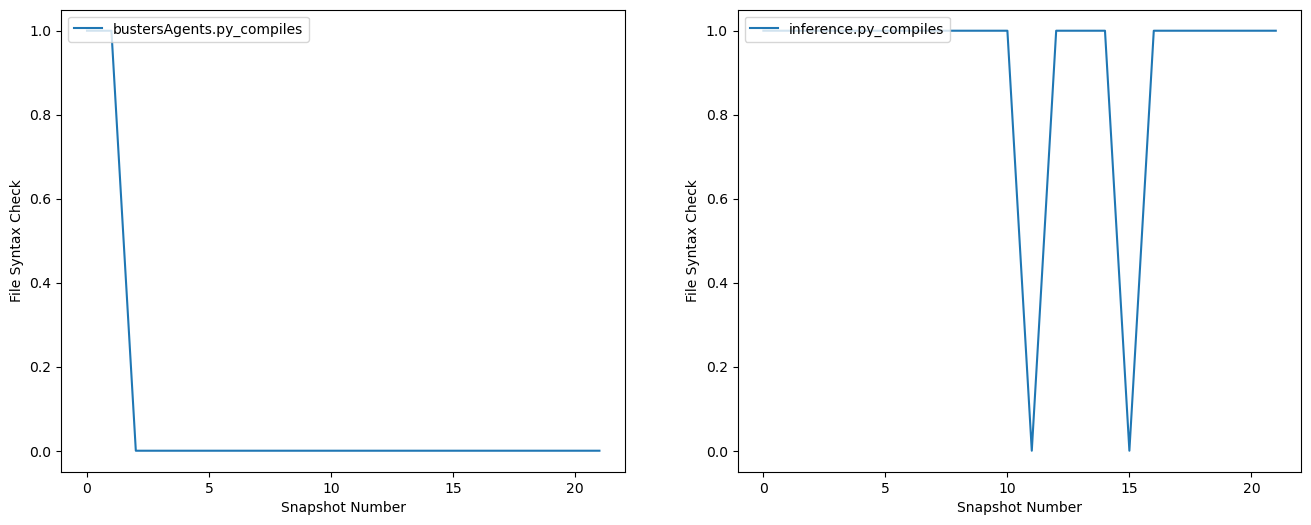

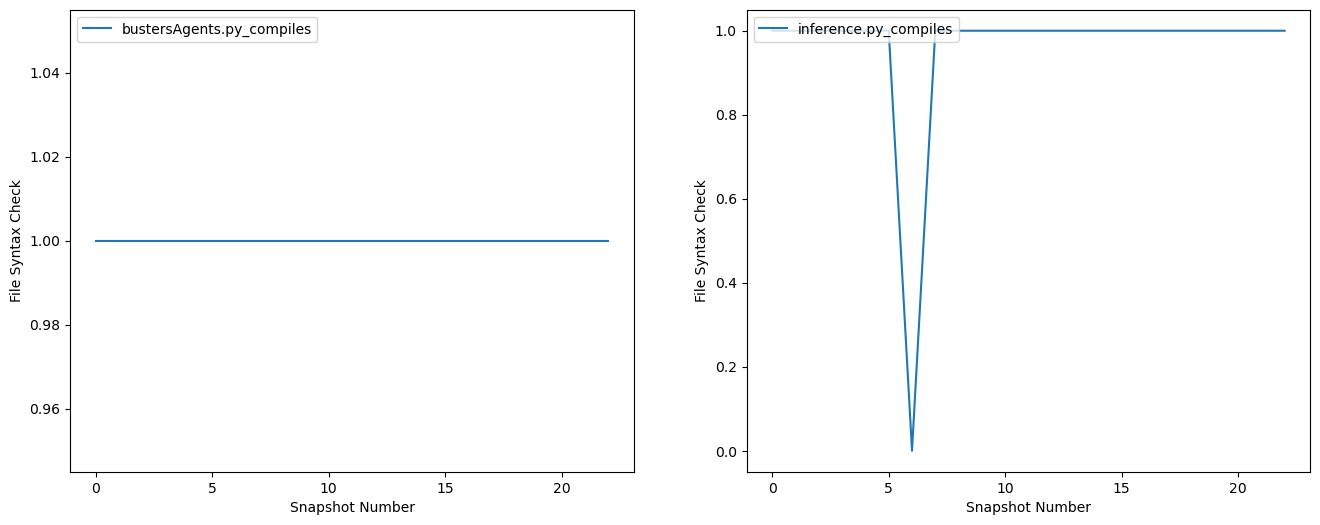

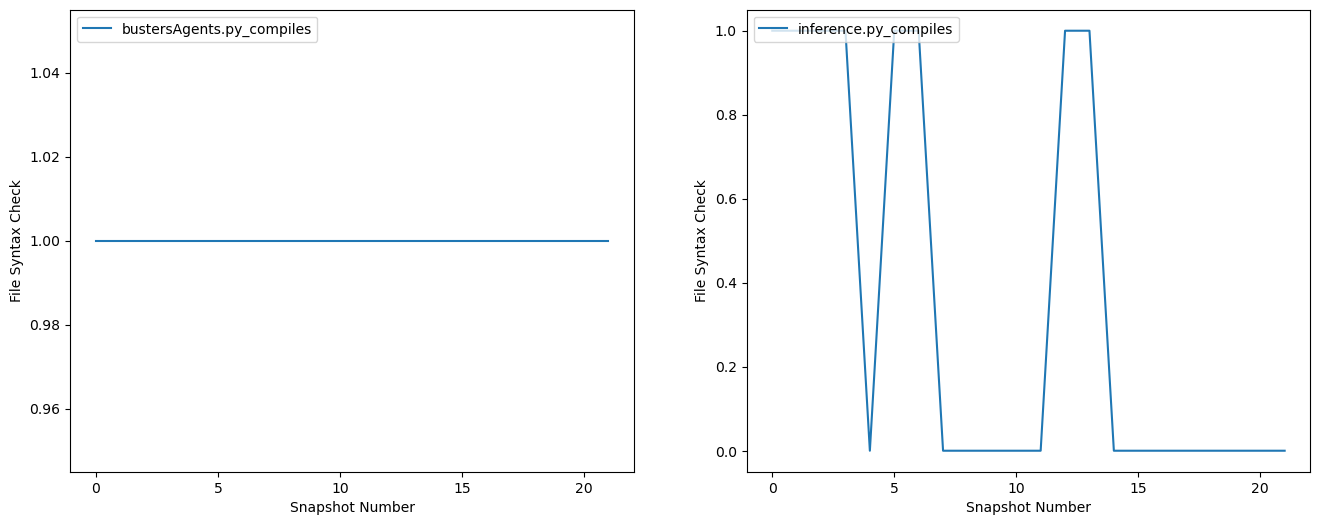

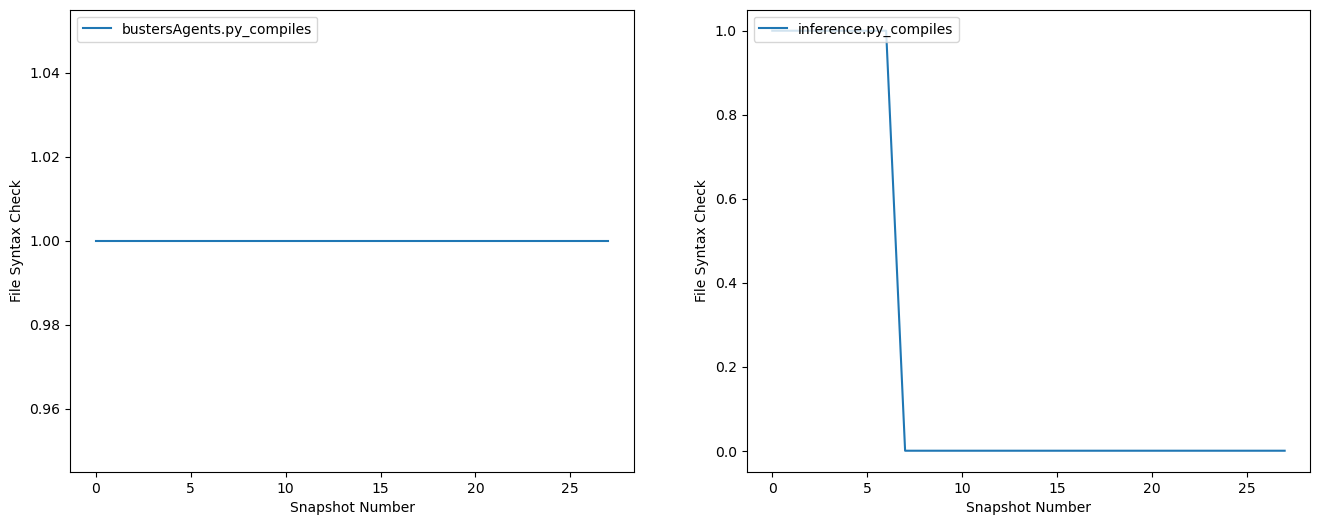

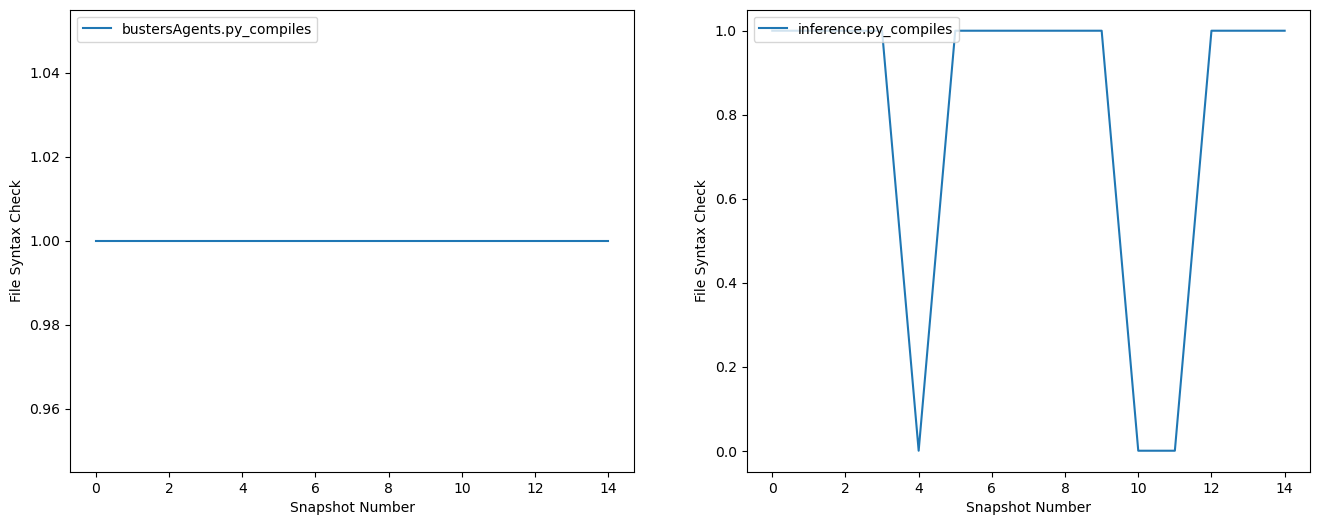

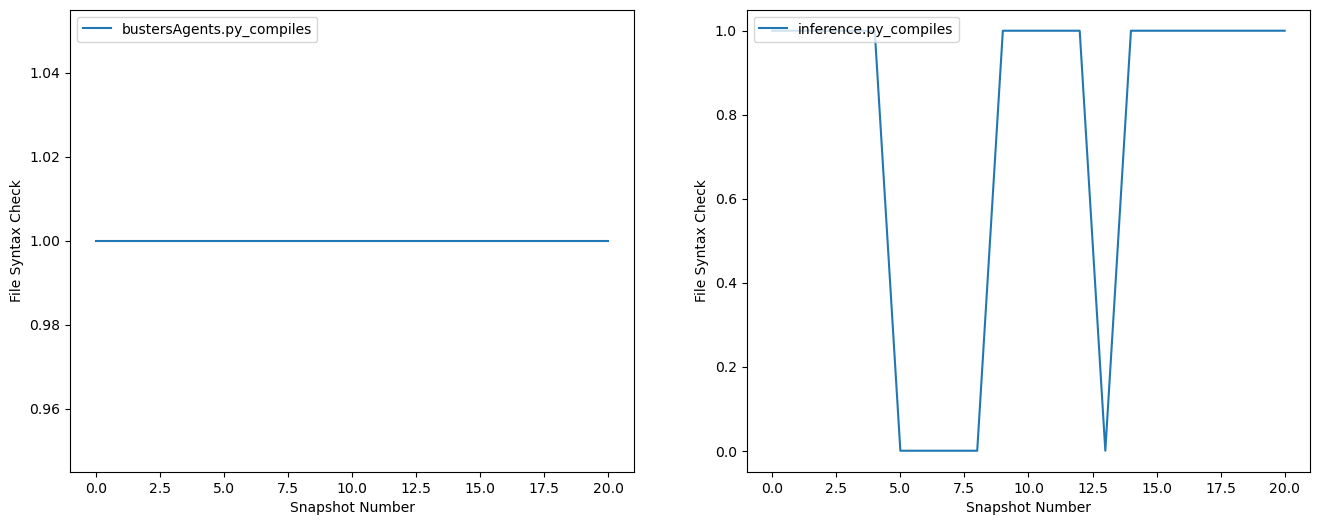

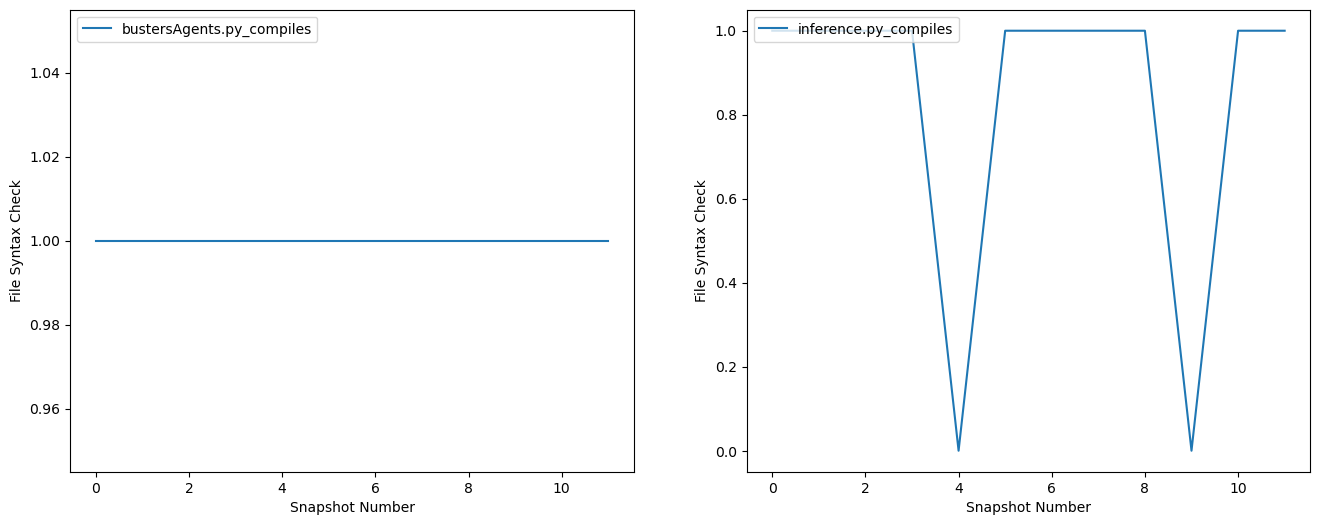

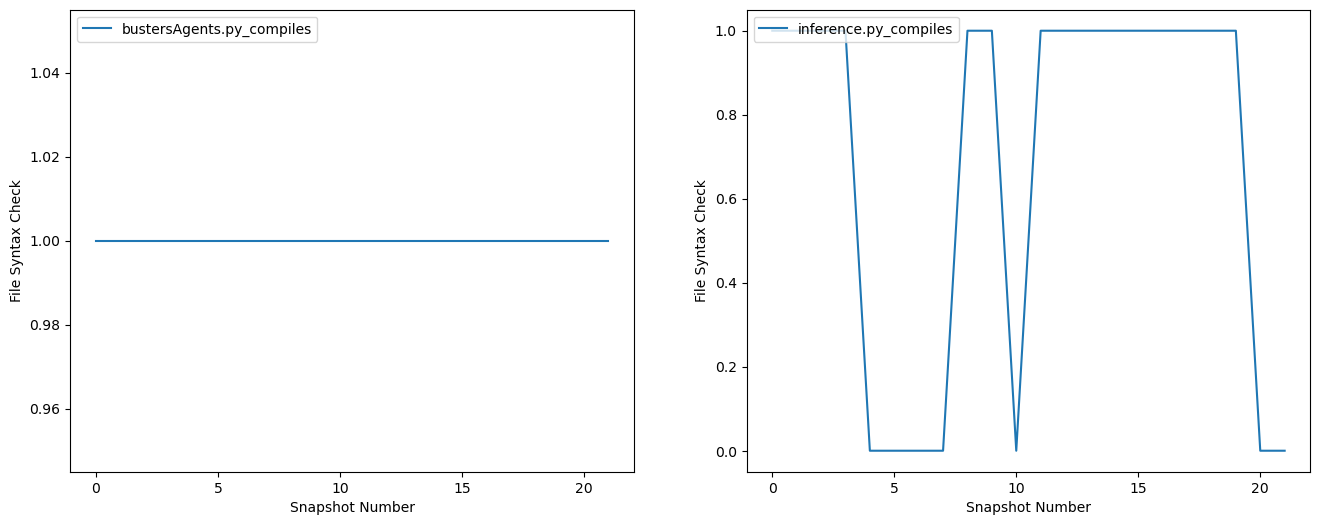

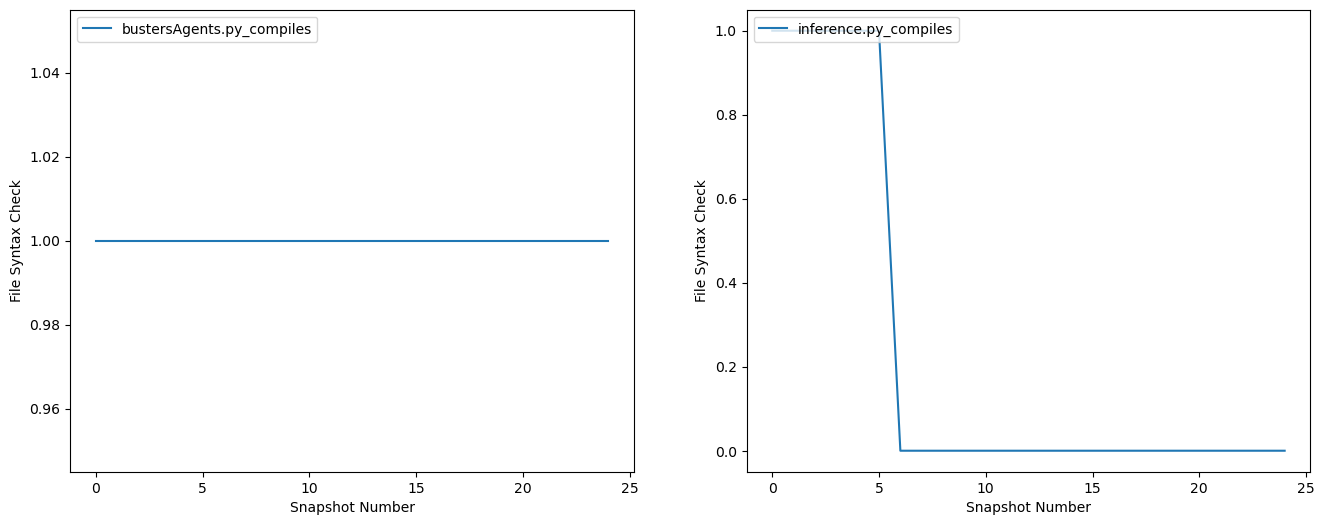

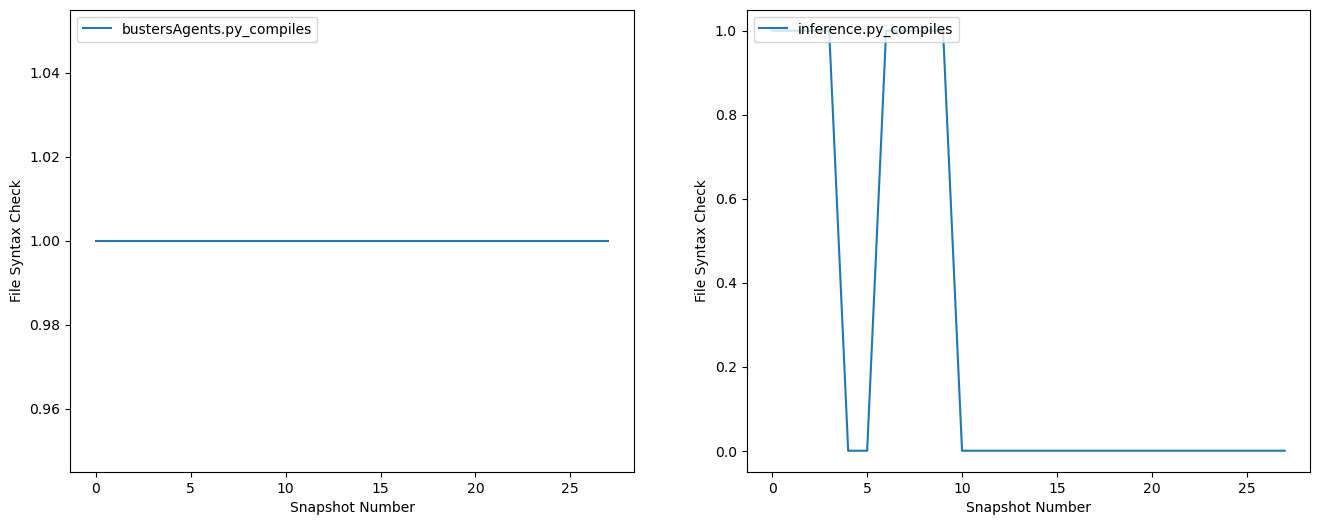

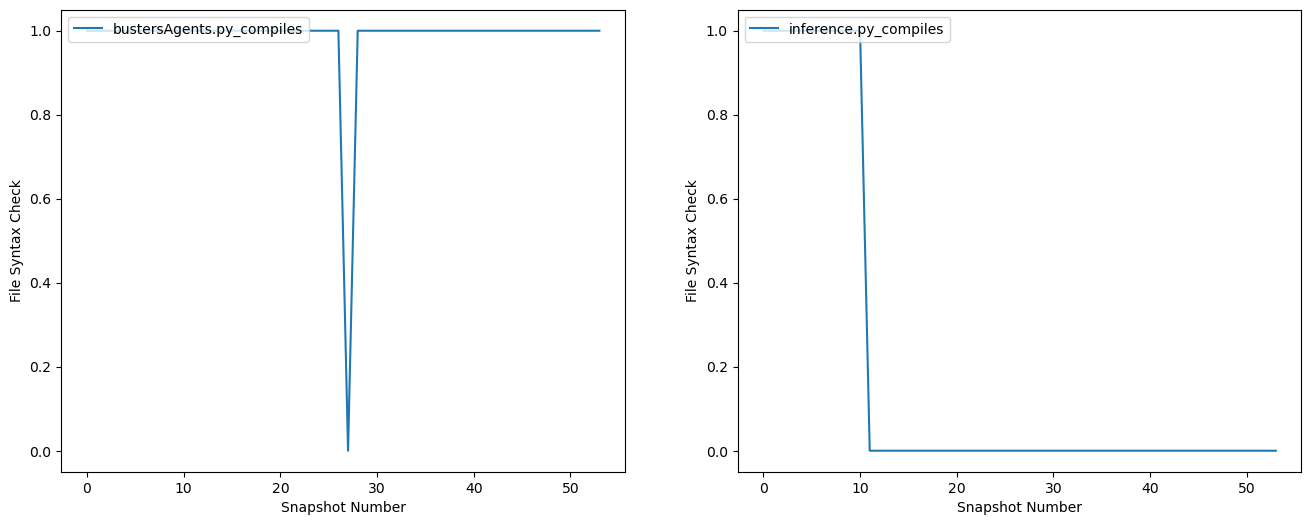

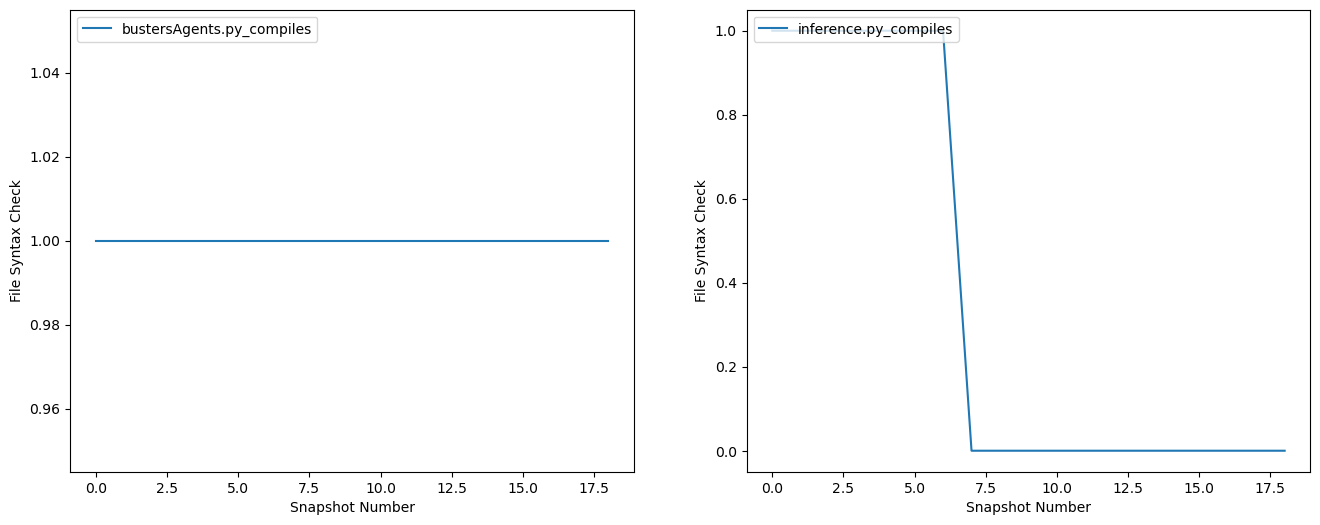

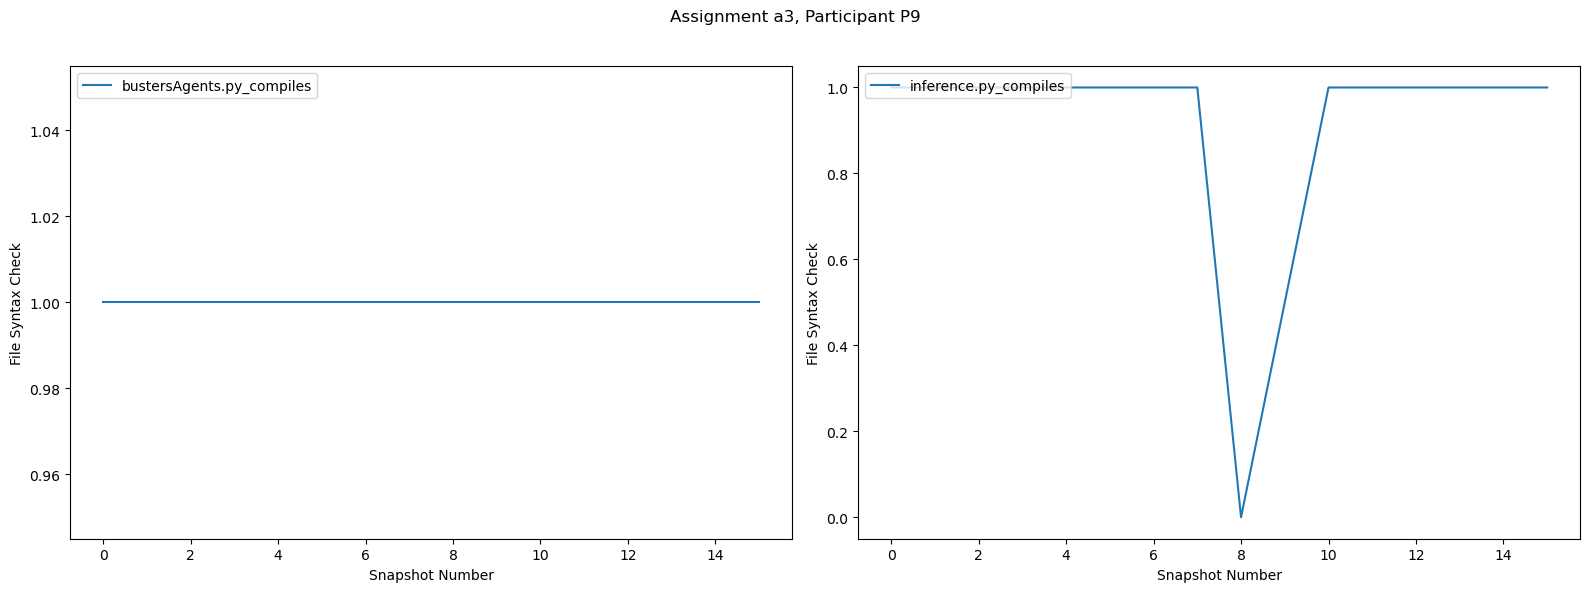

In [119]:
plot_syntax_checks(df_a3, a3=True)

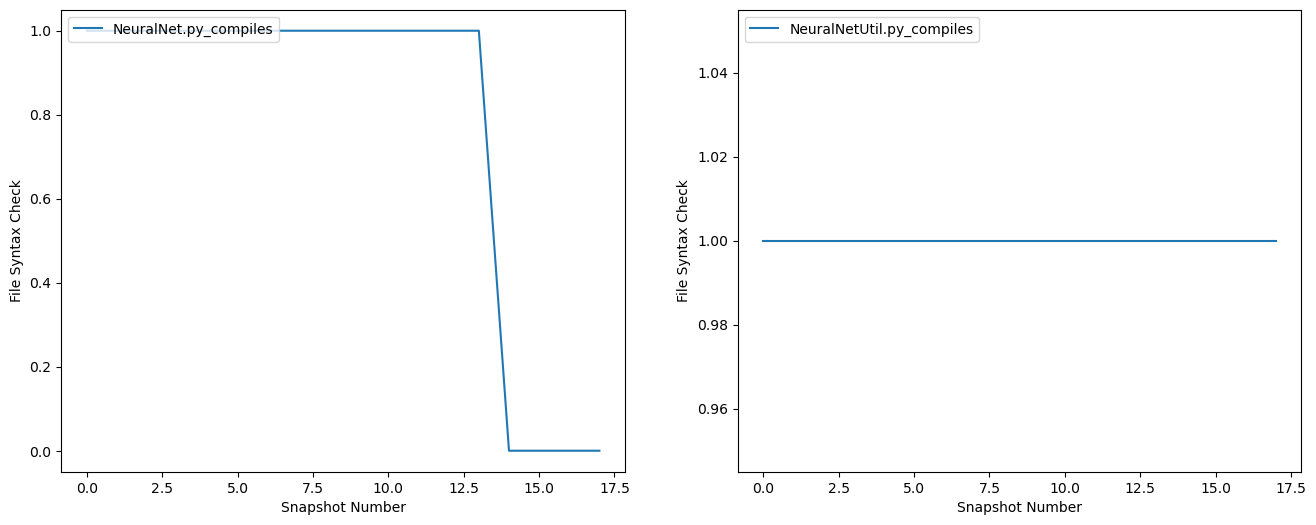

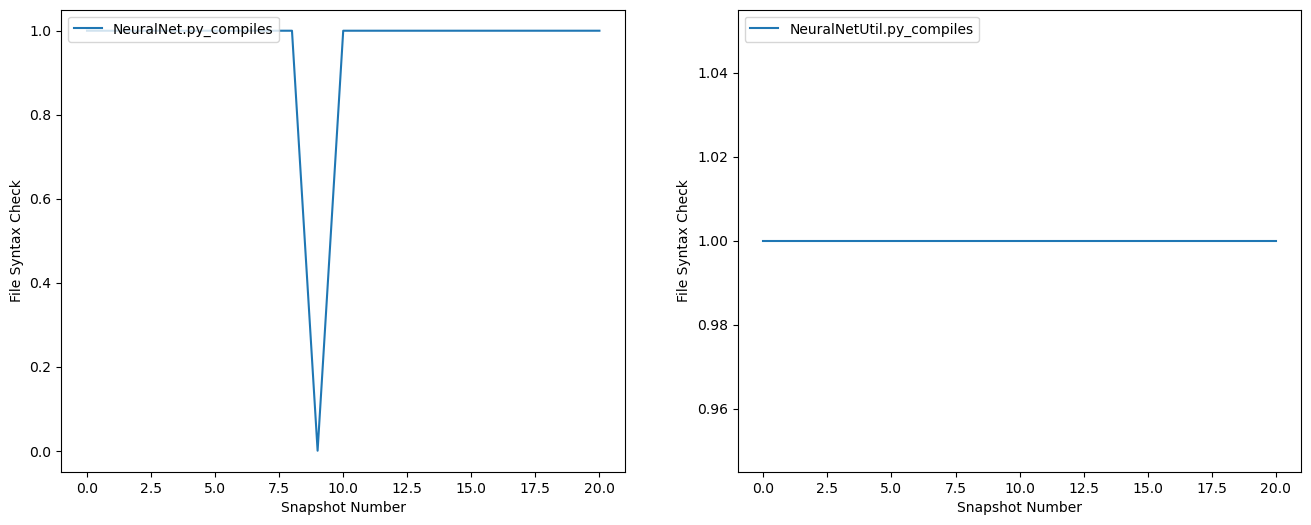

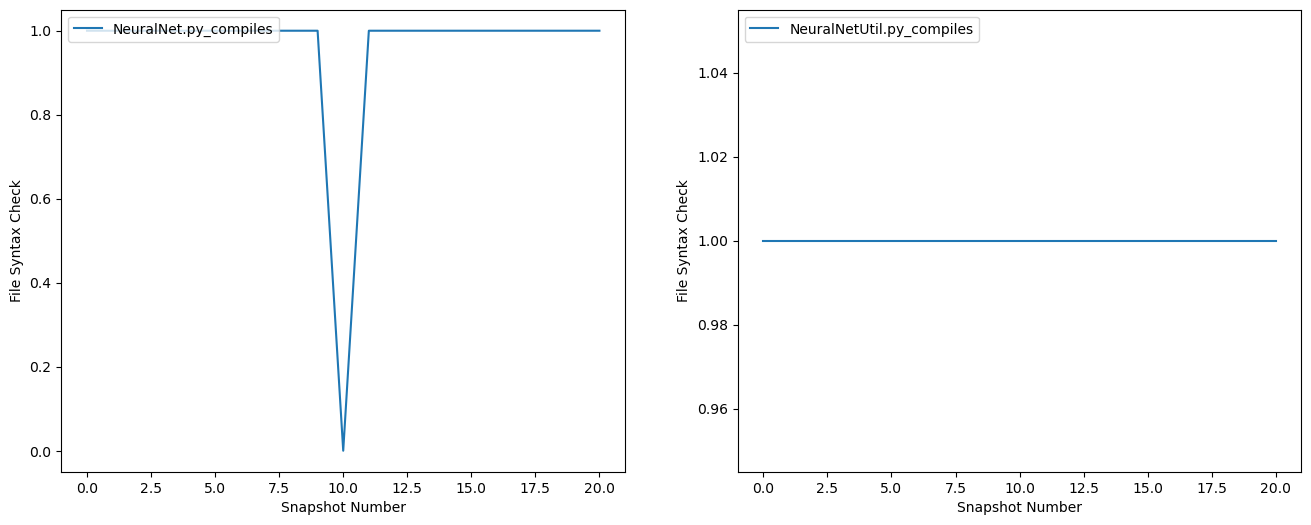

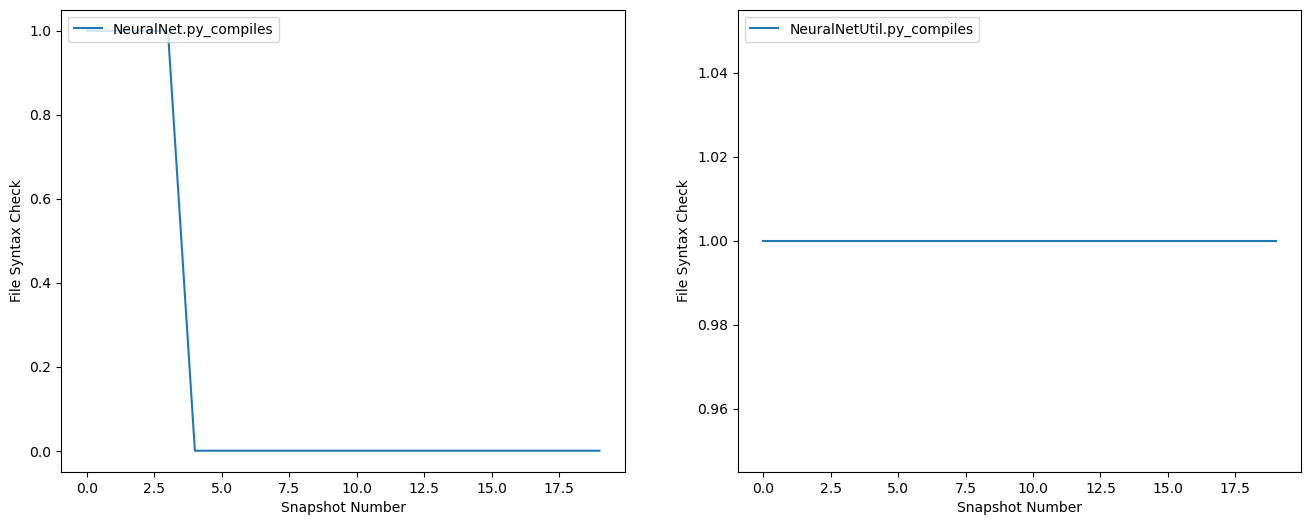

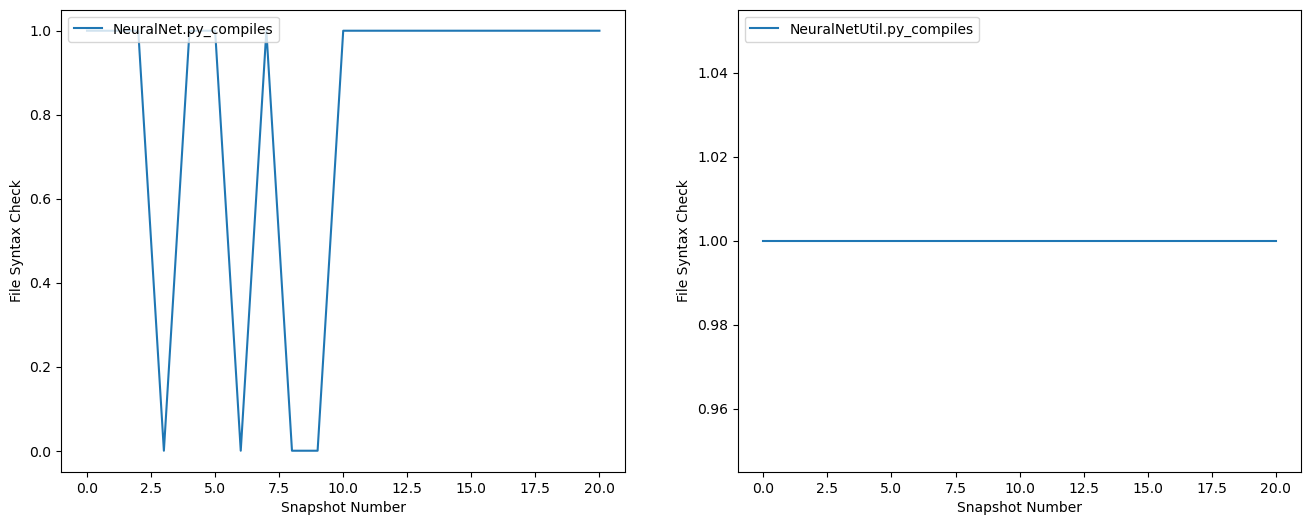

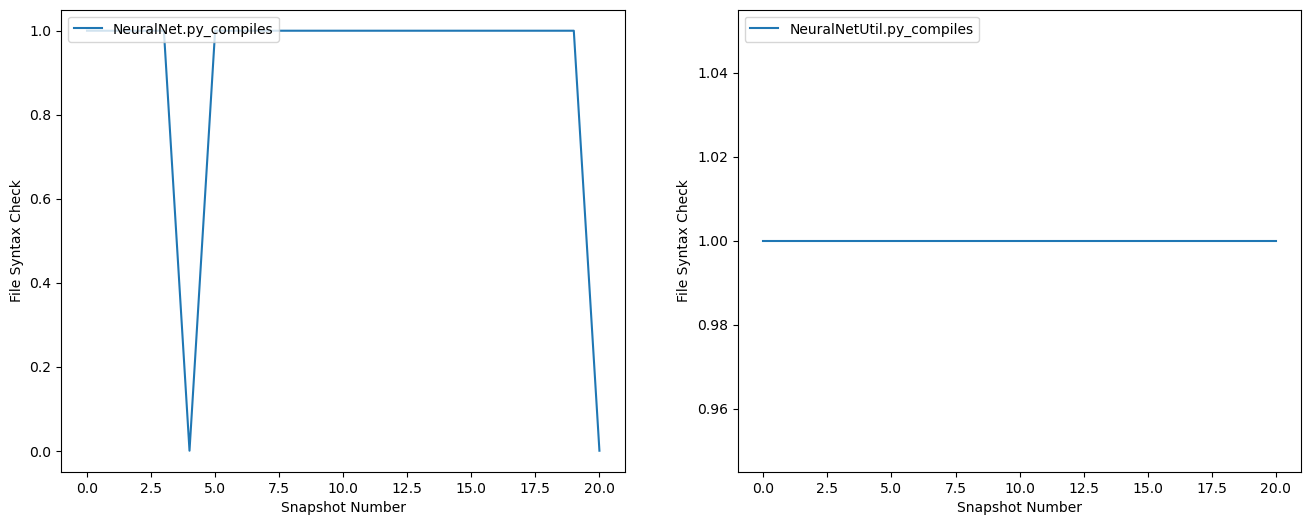

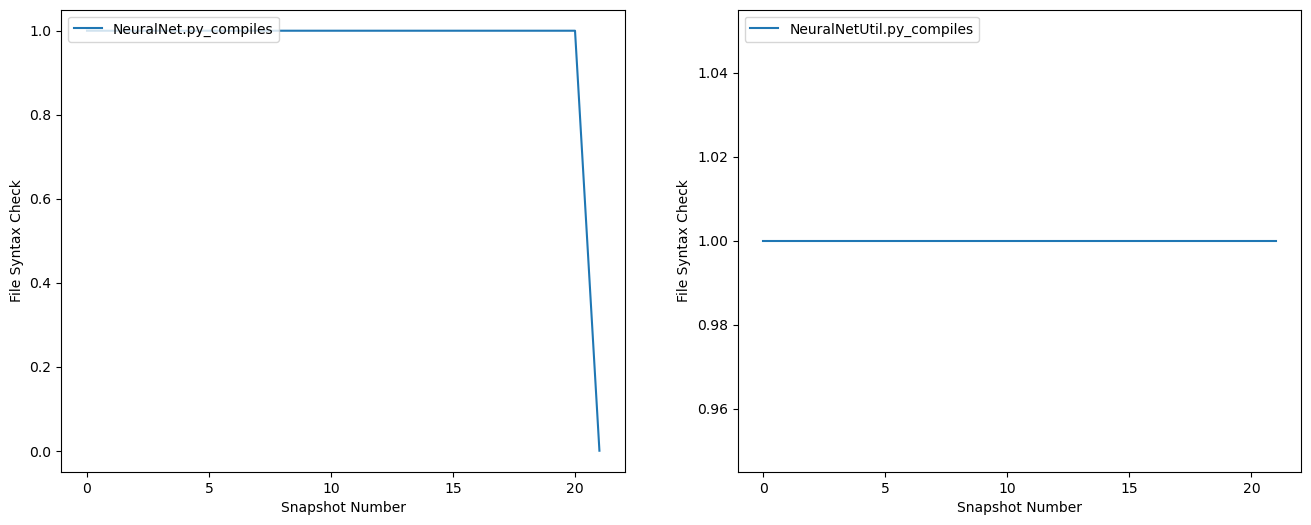

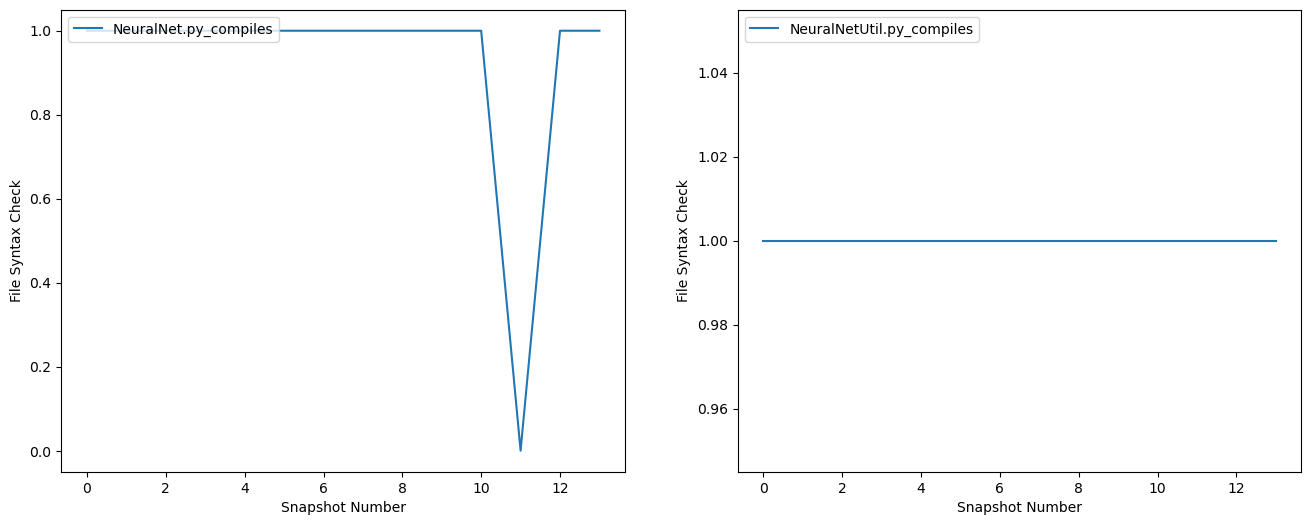

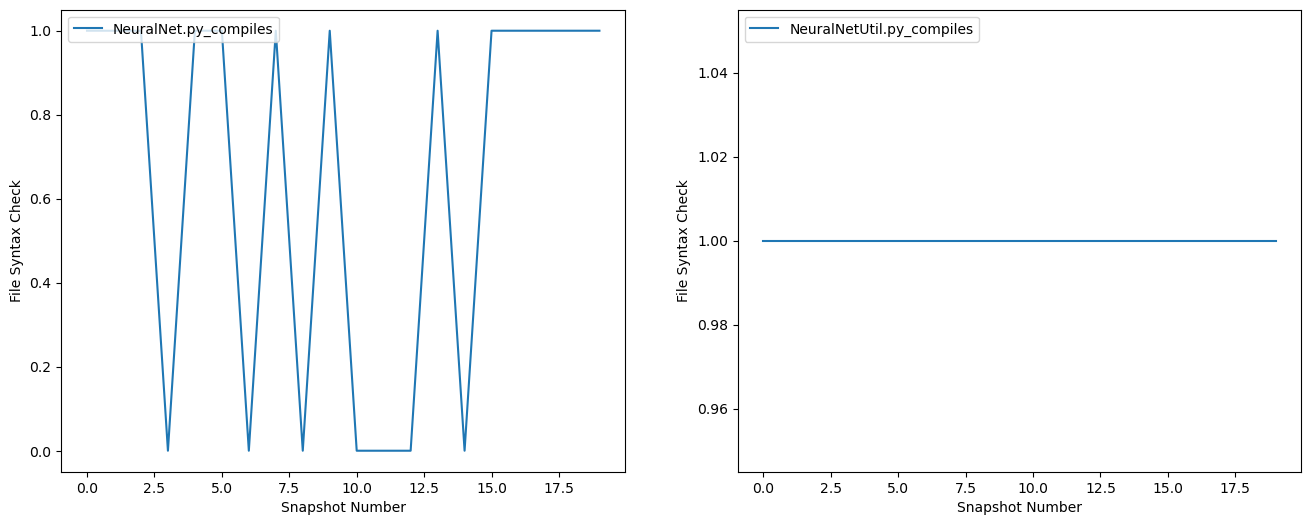

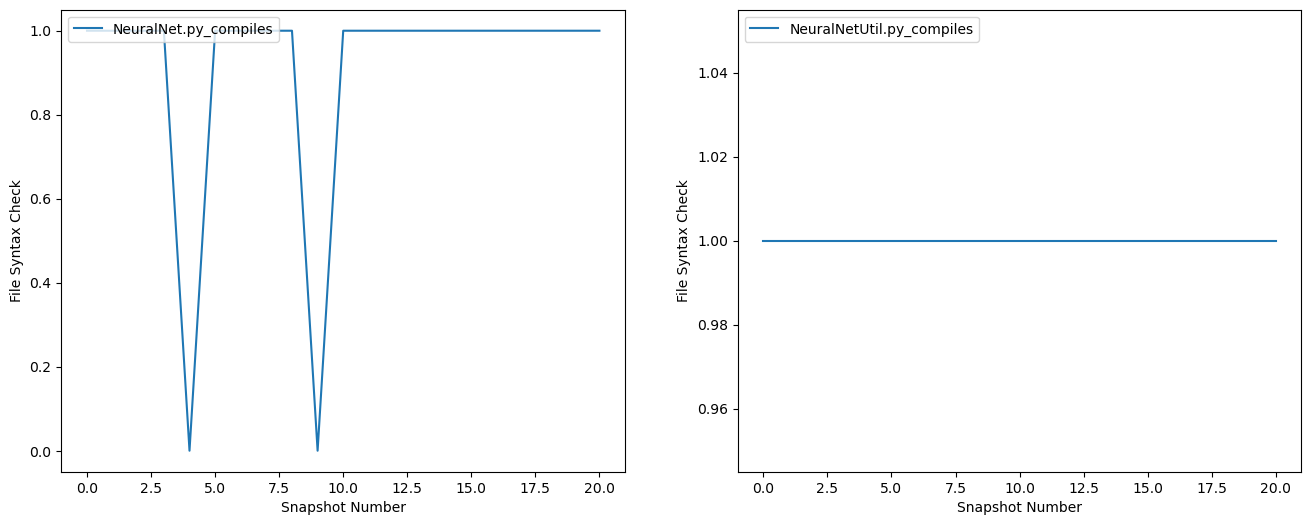

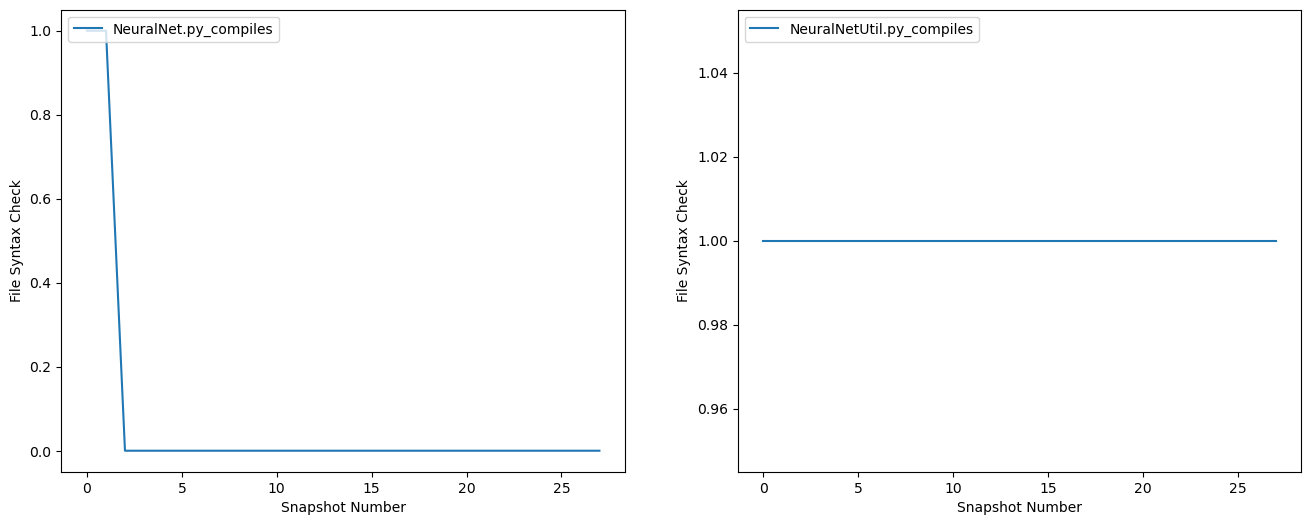

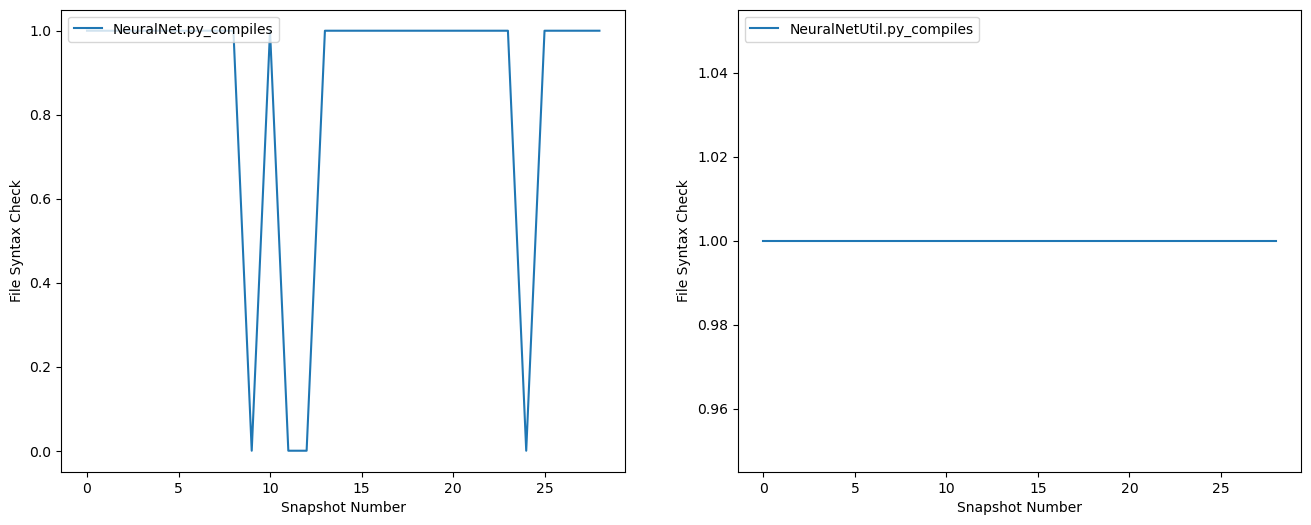

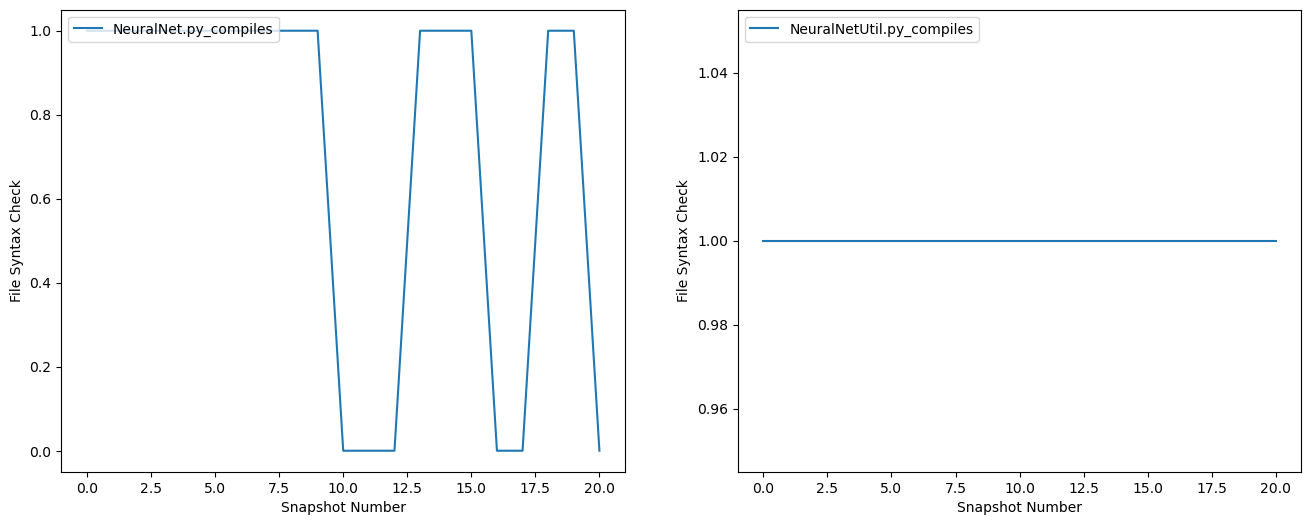

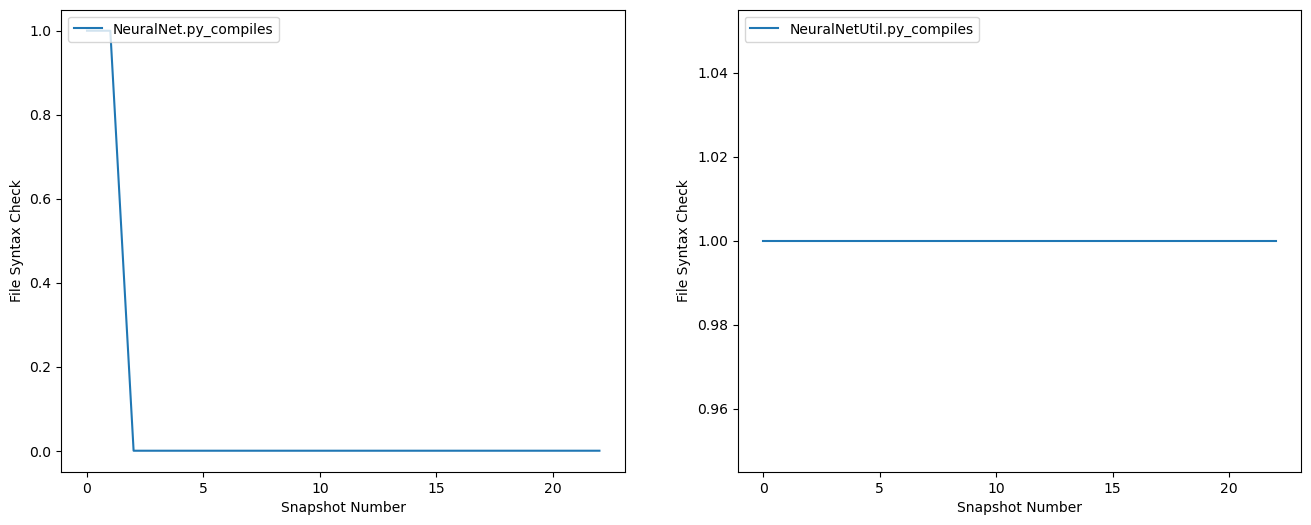

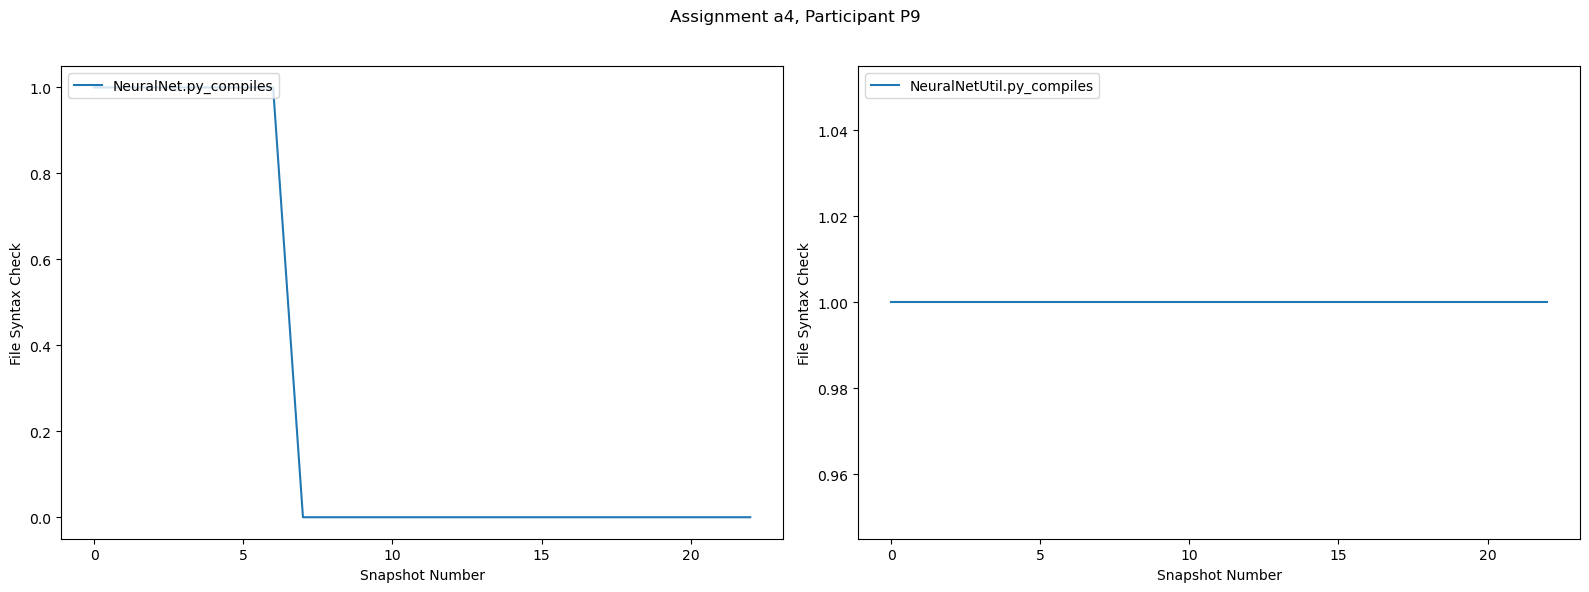

In [120]:
plot_syntax_checks(df_a4, a3=False)